## Plots showing WSU data properties

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, QTable
import astropy.units as u
import pandas as pd
import pickle
from importlib import reload
import wsu_plots
import wsu_db
import re

## read in data files

In [2]:
# fix up custom units
#gvis = u.def_unit('Gvis',namespace=globals())
#u.add_enabled_units([gvis])

In [4]:
# update after first revisions of impact statement
#result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20230420.ecsv')
#result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20230420.ecsv')
# fixed blc productsize
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20231212_without_band3_nbin3_npol4.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20231212_without_band3_nbin3_npol4.ecsv')

In [5]:
len(result_c7_mous)

2712

In [6]:
len(result_c8_mous)

2480

In [7]:
wsu_all = vstack([result_c7_mous,result_c8_mous])

In [8]:
len(wsu_all)

5192

In [9]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [10]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [11]:
reload(wsu_db)
wsu_db.write_out_db_info(wsu_all,filename='data/wsu_all_colinfo.tex')

In [12]:
# per MOUS/src
#result_c7_mous_src = Table.read('data/wsu_datarates_per_mous_src_cycle7_20230420.ecsv')
#result_c8_mous_src = Table.read('data/wsu_datarates_per_mous_src_cycle8_20230420.ecsv')
# fixed BLC productsize
result_c7_mous_src = Table.read('data/wsu_datarates_per_mous_src_cycle7_20231212_without_band3_nbin3_npol4.ecsv')
result_c8_mous_src = Table.read('data/wsu_datarates_per_mous_src_cycle8_20231212_without_band3_nbin3_npol4.ecsv')

In [13]:
len(result_c7_mous_src)

11501

In [14]:
len(result_c8_mous_src)

10842

In [15]:
wsu_all_src = vstack([result_c7_mous_src,result_c8_mous_src])

In [16]:
len(wsu_all_src)

22343

In [17]:
wsu_all_src.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_lat

In [18]:
reload(wsu_db)
wsu_db.write_out_db_info(wsu_all_src,filename='data/wsu_all_src_colinfo.tex')

In [19]:
np.max(wsu_all['wsu_nchan_spw_stepped2'])

<Quantity 74074.>

In [20]:
# original Cycle 7 and Cycle 8 data
cycle7tab = Table.read('data/result_table_cycle7_with_calc_values_20220923.csv')
cycle8tab = Table.read('data/result_table_cycle8_with_calc_values_20220923.csv')

In [21]:
cycle7_cycle8_orig = vstack([cycle7tab,cycle8tab])

In [22]:
cycle7_cycle8_orig.columns

<TableColumns names=('obs_publisher_did','facility_name','instrument_name','obs_id','dataproduct_type','calib_level','target_name','s_ra','s_dec','s_fov','s_resolution','t_min','t_max','t_exptime','t_resolution','em_min','em_max','em_res_power','pol_states','o_ucd','access_url','access_format','proposal_id','data_rights','gal_longitude','gal_latitude','band_list','em_resolution','bandwidth','antenna_arrays','is_mosaic','spatial_resolution','frequency_support','frequency','velocity_resolution','publication_year','proposal_abstract','schedblock_name','sensitivity_10kms','cont_sensitivity_bandwidth','pwv','group_ous_uid','member_ous_uid','asdm_uid','type','scan_intent','science_observation','spatial_scale_max','qa2_passed','science_keyword','scientific_category','collections','array','points_per_fov','spw_freq','spw_specwidth','spw_nchan','pb','cell','imsize','spw_nchan_max','mitigated','failed_mitigation_nbin1','failed_mitigation_nbin2','ntarget')>

In [23]:
len(cycle7tab)

51368

In [24]:
len(cycle8tab)

50107

In [25]:
len(cycle7_cycle8_orig)

101475

In [26]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [27]:
np.max(wsu_all['wsu_productsize_later_4x_stepped2']).to('PB')

<Quantity 1.15929177 Pbyte>

In [28]:
idx = np.argmax(wsu_all['wsu_productsize_later_4x_stepped2'])
wsu_all[idx]['mous','proposal_id','schedblock_name','wsu_velres_stepped2','ntarget','wsu_nchan_spw_stepped2','wsu_bandwidth_later_4x','wsu_nspw_later_4x']

<Row index=1499>
         mous          proposal_id    schedblock_name  wsu_velres_stepped2 ntarget wsu_nchan_spw_stepped2 wsu_bandwidth_later_4x wsu_nspw_later_4x
                                                              km / s                                               GHz                            
        str22             str14            str26             float64       float64        float64                float64               int64      
--------------------- -------------- ----------------- ------------------- ------- ---------------------- ---------------------- -----------------
uid://A001/X1465/Xd63 2019.1.01425.S NGC1333I_a_06_TM1 0.14525775724691203     7.0                18518.0                   32.0                16

So it looks like the largest product size is a case with 0.1 km/s resolution and seven targets. Everything else (WSU BW and number spectral windows looks reasonable).

In [29]:
np.unique(wsu_all['scientific_category_proposal'])

<Column name='scientific_category_proposal' dtype='str52' length=5>
Circumstellar disks, exoplanets and the solar system
            Cosmology and the high redshift Universe
                        Galaxies and galactic nuclei
              ISM, star formation and astrochemistry
                       Stellar evolution and the Sun

In [31]:
# band 1 and 2 estimates
band1_band2_rep = Table.read('data/wsu_datarates_mit_per_mous_band12_20231212.ecsv')

In [32]:
band1_band2_agg = pickle.load(open('data/sample_band1_band2_min_nbin/wsu_datarates_mit_per_mous_band12_20231212_agg.pkl','rb'))

In [33]:
band1_band2_agg.keys()

dict_keys(['hist_cumulative', 'hist', 'hist_log'])

In [34]:
band1_band2_agg['hist_cumulative']['wsu_datarate_early_stepped2_typical'].keys()

dict_keys(['unit', 'bins', 'dist_counts', 'median', 'min', 'max'])

## checking for VLBI projects

In [35]:
for myprop in wsu_all['proposal_id']:
    if re.search('V',myprop):
        print(myprop)

There don't appear to be any.

In [36]:
myprop = '2019.1.000283.V'
re.search('V',myprop)

<re.Match object; span=(14, 15), match='V'>

In [37]:
myprop = '2019.1.000283.S'
re.search('V',myprop)

## Plot the bin distribution of the sample

In [38]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

5192
[[ 27. 215. 180. 557. 461.]
 [  0.  12.   7. 241. 192.]
 [  6.  15.  49.  25.  92.]
 [179. 421. 627. 367. 387.]
 [ 80. 219. 165. 174. 252.]
 [ 11.  19.  46.  53.  72.]
 [  0.  15.   4.   3.  11.]
 [  0.   4.   2.   0.   2.]]


array([[ 27., 215., 180., 557., 461.],
       [  0.,  12.,   7., 241., 192.],
       [  6.,  15.,  49.,  25.,  92.],
       [179., 421., 627., 367., 387.],
       [ 80., 219., 165., 174., 252.],
       [ 11.,  19.,  46.,  53.,  72.],
       [  0.,  15.,   4.,   3.,  11.],
       [  0.,   4.,   2.,   0.,   2.]])

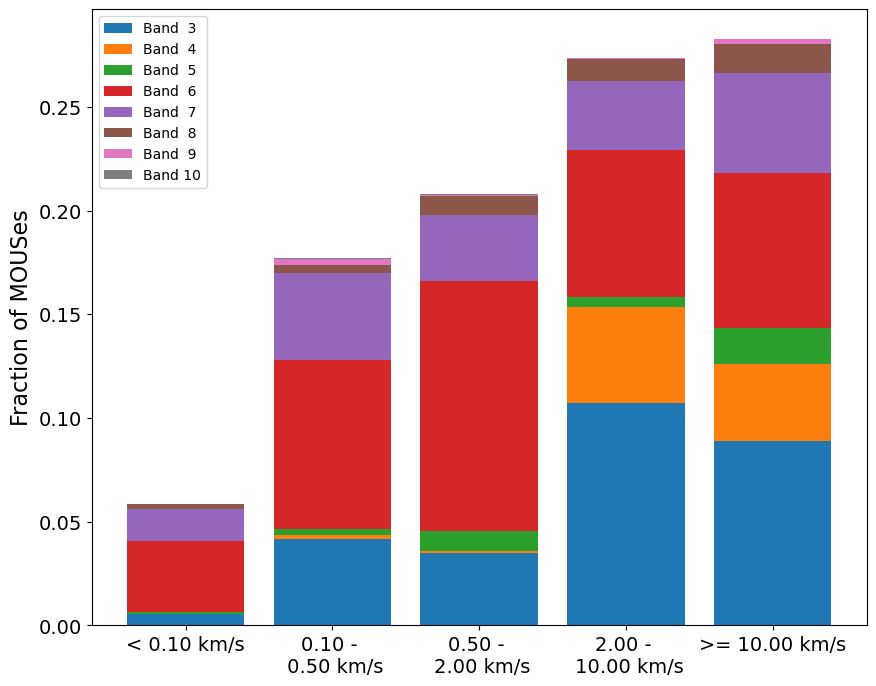

In [39]:
reload(wsu_plots)
wsu_plots.make_velocity_bar(wsu_all,band_label='band',vel_label='blc_velres',ytitle='Fraction of MOUSes',
                           pltname='plots/cycle7_cycle8_mous_finestspw_distribution.png')

101475
[[7.6000e+01 3.1150e+03 2.9488e+04 5.5170e+03 7.1690e+03]
 [0.0000e+00 5.5000e+01 6.4000e+01 2.5120e+03 3.5880e+03]
 [1.2000e+01 1.3500e+02 2.4900e+02 1.1300e+02 7.1100e+02]
 [1.9650e+03 1.1160e+04 1.2950e+04 2.2820e+03 1.0346e+04]
 [3.6500e+02 1.6960e+03 2.1430e+03 7.2700e+02 3.2590e+03]
 [3.4000e+01 4.9000e+01 3.7900e+02 2.7200e+02 7.1800e+02]
 [0.0000e+00 6.6000e+01 6.0000e+01 2.8000e+01 1.0800e+02]
 [0.0000e+00 3.2000e+01 1.6000e+01 0.0000e+00 1.6000e+01]]


array([[7.6000e+01, 3.1150e+03, 2.9488e+04, 5.5170e+03, 7.1690e+03],
       [0.0000e+00, 5.5000e+01, 6.4000e+01, 2.5120e+03, 3.5880e+03],
       [1.2000e+01, 1.3500e+02, 2.4900e+02, 1.1300e+02, 7.1100e+02],
       [1.9650e+03, 1.1160e+04, 1.2950e+04, 2.2820e+03, 1.0346e+04],
       [3.6500e+02, 1.6960e+03, 2.1430e+03, 7.2700e+02, 3.2590e+03],
       [3.4000e+01, 4.9000e+01, 3.7900e+02, 2.7200e+02, 7.1800e+02],
       [0.0000e+00, 6.6000e+01, 6.0000e+01, 2.8000e+01, 1.0800e+02],
       [0.0000e+00, 3.2000e+01, 1.6000e+01, 0.0000e+00, 1.6000e+01]])

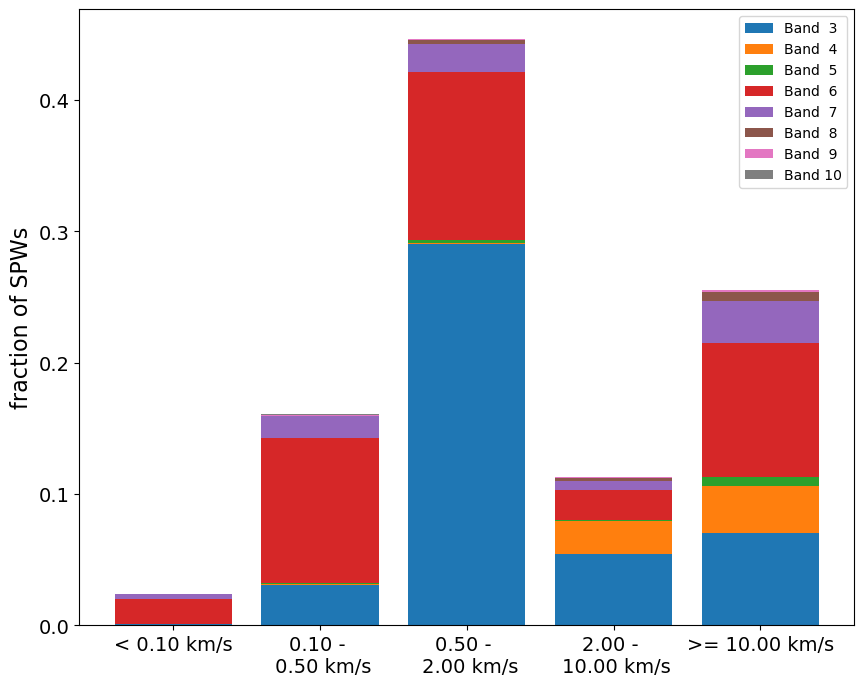

In [40]:
reload(wsu_plots)
wsu_plots.make_velocity_bar(cycle7_cycle8_orig,band_label='band_list',vel_label='velocity_resolution',
                           ytitle='fraction of SPWs',
                           pltname='plots/cycle7_cycle8_mous_spw_distribution.png')

## Plot cube sizes

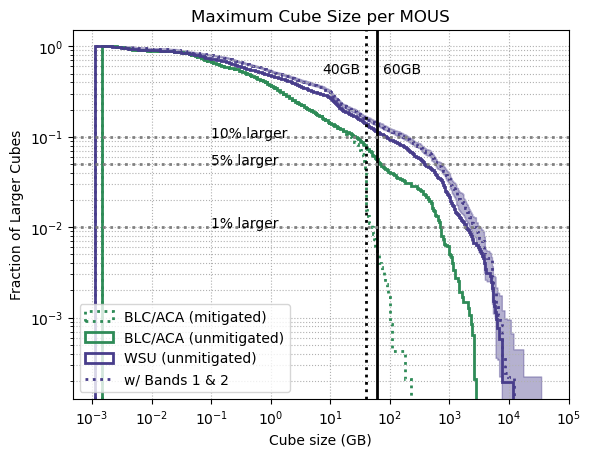

In [41]:
reload(wsu_plots)
wsu_plots.plot_cubesize_comparison(wsu_all,
                                   band1_band2_estimate = band1_band2_agg['hist_cumulative'],
                                   plot_title='Maximum Cube Size per MOUS',
                                   figname='plots/cubesize_distribution.png')

In [42]:
np.max(wsu_all['wsu_cubesize_stepped2']).to('TB')

<Quantity 11.74187418 Tbyte>

In [206]:
np.nanmax(wsu_all['predcubesize'].value)/1000.0

MaskedNDArray(2.83)

In [208]:
np.nanmax(wsu_all['mitigatedcubesize'].value)/1000.0

MaskedNDArray(0.224)

In [43]:
bin_max=18 #TB
nbin=100

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1109: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))


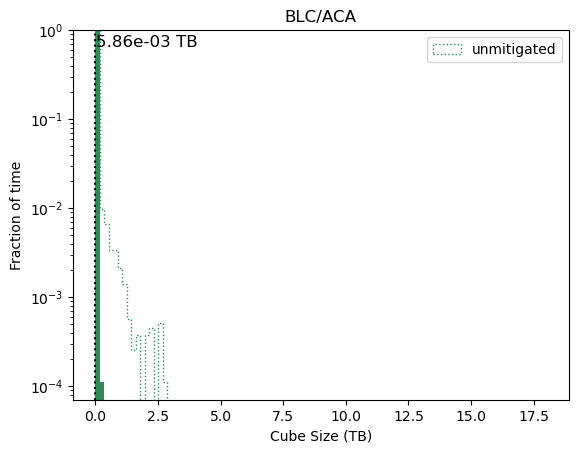

In [44]:
reload(wsu_plots)
wsu_plots.plot_cubesize_result_hist(wsu_all,
                                    bin_min=0, bin_max=bin_max, nbin=nbin,
                                    data_val='mitigatedcubesize',
                                    title='BLC/ACA',
                                    add_wavg=True,
                                    pltname='plots/cubesize_blc.png')

In [45]:
np.nansum(wsu_all['mitigatedcubesize'] > 60*u.GB)/len(wsu_all)*100

0.5200308166409862

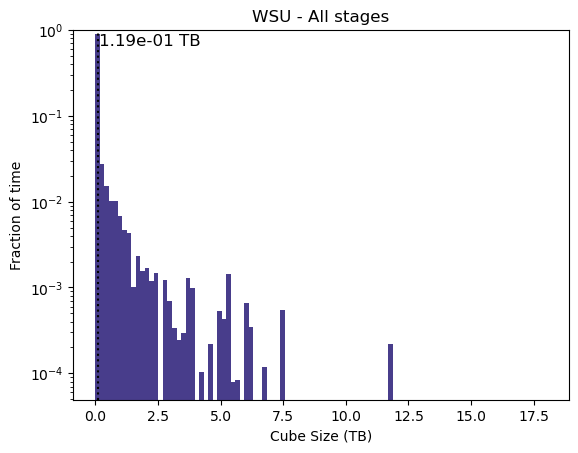

In [46]:
reload(wsu_plots)
wsu_plots.plot_cubesize_result_hist(wsu_all,
                                    bin_min=0, bin_max=bin_max, nbin=nbin,
                                    data_val='wsu_cubesize_stepped2',
                                    title='WSU - All stages',
                                    add_wavg=True,
                                    pltname='plots/cubesize_wsu.png')

In [47]:
np.log10(np.max(wsu_all['wsu_nchan_spw_stepped2']))

<Quantity 4.8696658>

In [48]:
np.max(wsu_all['wsu_nchan_spw_stepped2'])

<Quantity 74074.>

In [49]:
np.log10(np.max(wsu_all['wsu_nchan_spw_stepped2']/7680))

<Quantity 0.98430458>

In [50]:
np.log10(np.max(wsu_all['wsu_nchan_spw_stepped2']/3840))

<Quantity 1.28533457>

In [51]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (1.7, 5.9)
log_nchan_step = 0.1

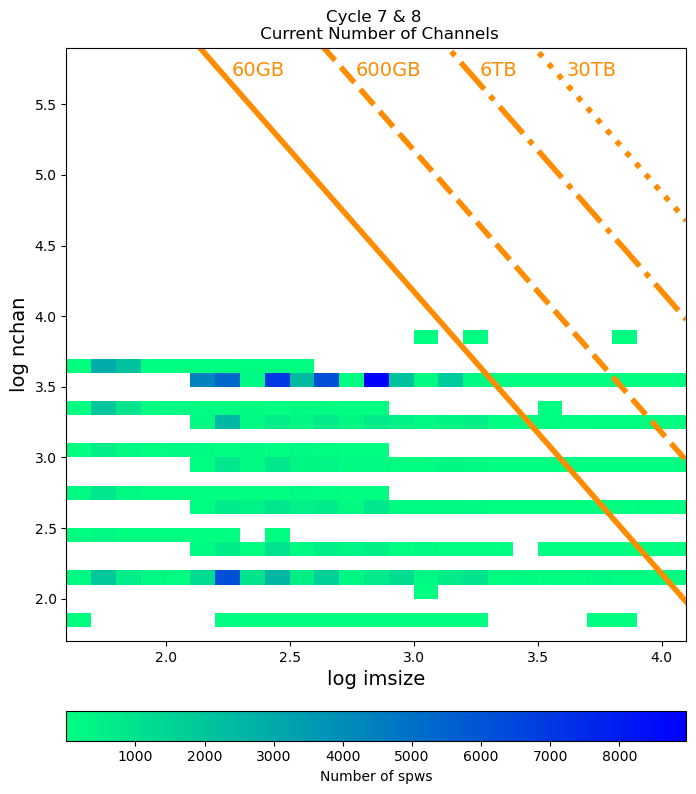

In [52]:
## This uses the original mous/src/spw database. The total number of rows = src * spw
reload(wsu_plots)
h_current, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(cycle7_cycle8_orig, 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels',
                                                            cmap='winter_r',
                                                            band2_specscan=False,
                                                            mit_limits=True,
                                                            pltname='plots/density_plot_nolines.png')

With the plots below the nspw=10 for band2_specscan will give the correct number of channels. Because the band2specscan numbers are the later_2x version with 10 spws, not the later 4x values.

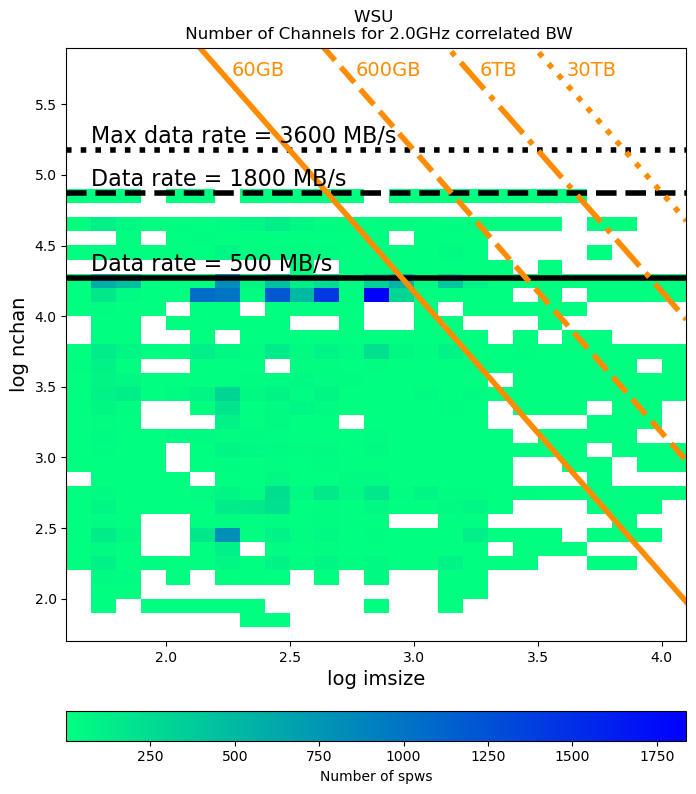

In [53]:
# This version doesn't have any weights so it's number of srcs
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU \n Number of Channels for 2.0GHz correlated BW',
                                                                cmap='winter_r',
                                                                band2_specscan=True,nspw=8,
                                                                pltname='plots/density_plot_wsu_spw.png')

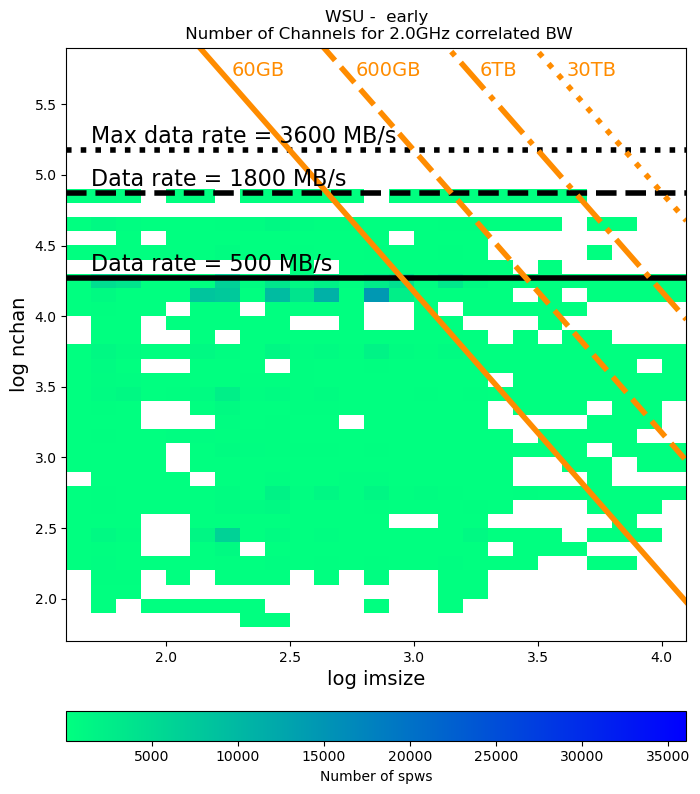

In [54]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU -  early\n Number of Channels for 2.0GHz correlated BW',
                                                                cmap='winter_r',vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=8,
                                                                myweights=wsu_all_src['wsu_nspw_early'],
                                                                pltname='plots/density_plot_wsu_spw_early.png')

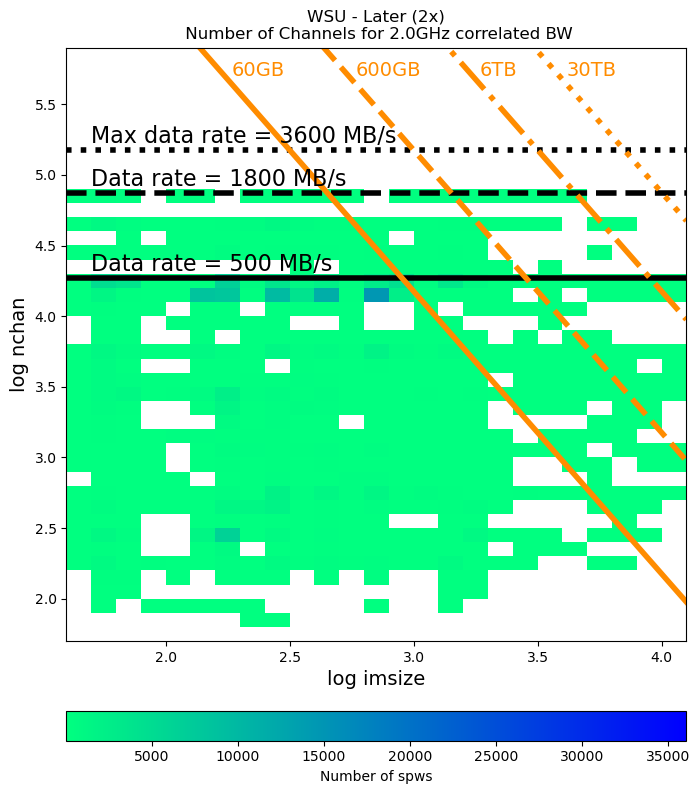

In [55]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU - Later (2x)\n Number of Channels for 2.0GHz correlated BW',
                                                                cmap='winter_r',vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=8,
                                                                myweights=wsu_all_src['wsu_nspw_later_2x'],
                                                                pltname='plots/density_plot_wsu_spw_later_2x.png')

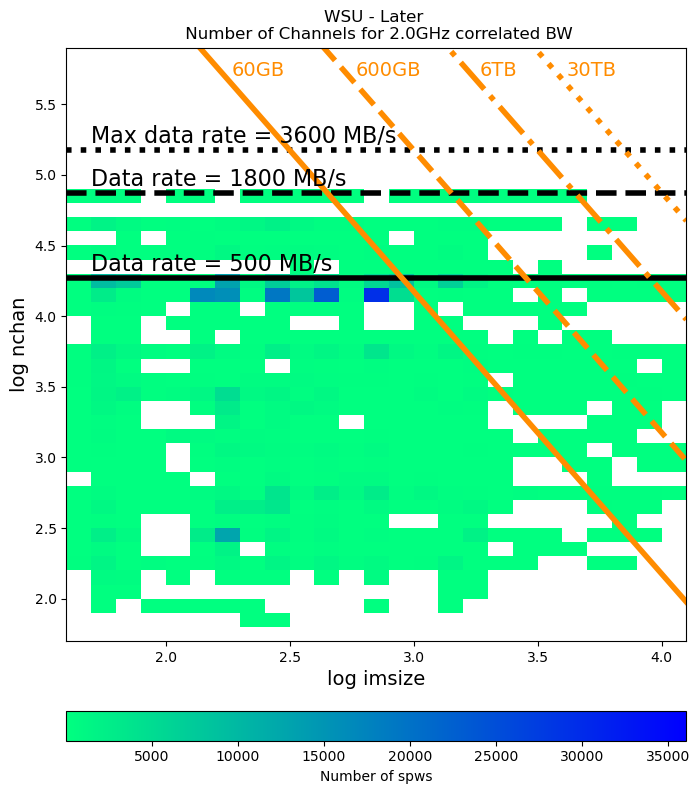

In [56]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU - Later \n Number of Channels for 2.0GHz correlated BW',
                                                                cmap='winter_r', vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=8,
                                                                myweights=wsu_all_src['wsu_nspw_later_4x'],
                                                                pltname='plots/density_plot_wsu_spw_later_4x.png')

In [57]:
np.log10(80000)

4.903089986991944

In [58]:
np.nanmin(h_wsu_spw)

16.0

In [59]:
np.nanmax(h_wsu_spw)

29408.0

## Plot nebs per mous

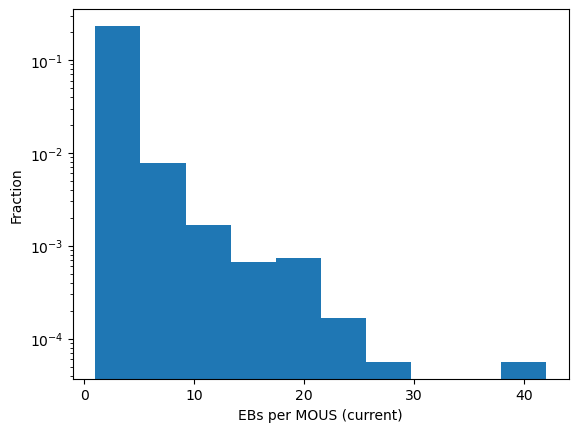

In [60]:
idx = (wsu_all['procedure'] == 'hifa_calimage') | (wsu_all['procedure'] == 'hifa_calimage_renorm')
plt.hist(wsu_all[idx]['nEB'],log=True,density=True)
plt.xlabel('EBs per MOUS (current)')
plt.ylabel('Fraction')
plt.savefig('plots_pl/nebs_per_mous.png')

## Plot nspws

In [61]:
np.sum(idx)

4348

In [62]:
np.max(wsu_all['wsu_nspw_later_4x'])

16

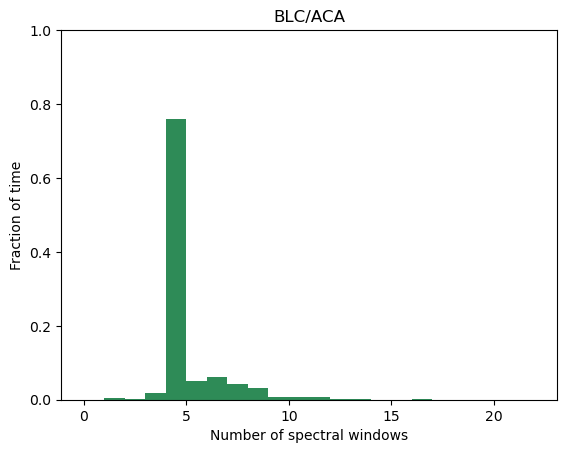

In [63]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='blc_nspw',
                       title='BLC/ACA',
                       pltname='plots/nspw_blc.png')

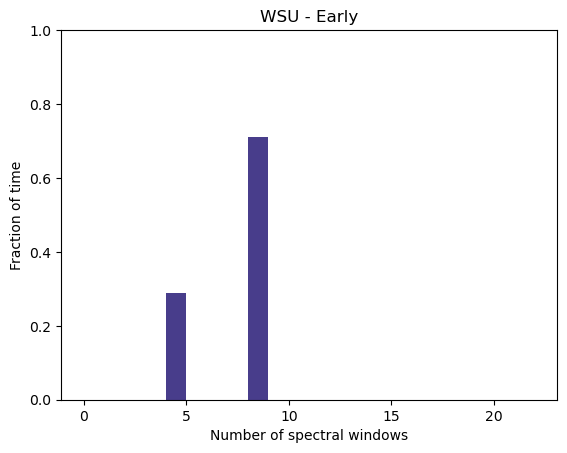

In [64]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='wsu_nspw_early',
                       title='WSU - Early',
                       pltname='plots/nspw_early.png')

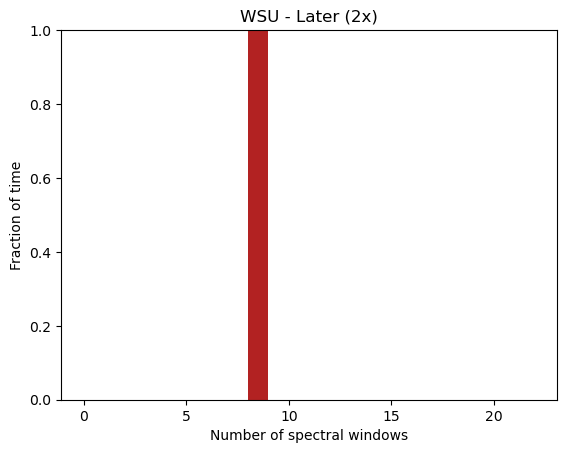

In [65]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='wsu_nspw_later_2x',
                       title='WSU - Later (2x)',
                       pltname='plots/nspw_later_2x.png')

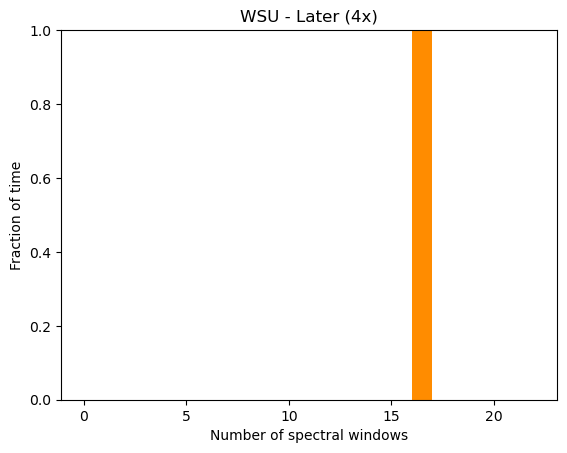

In [66]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='wsu_nspw_later_4x',
                       title='WSU - Later (4x)',
                       pltname='plots/nspw_later_4x.png')

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23.]


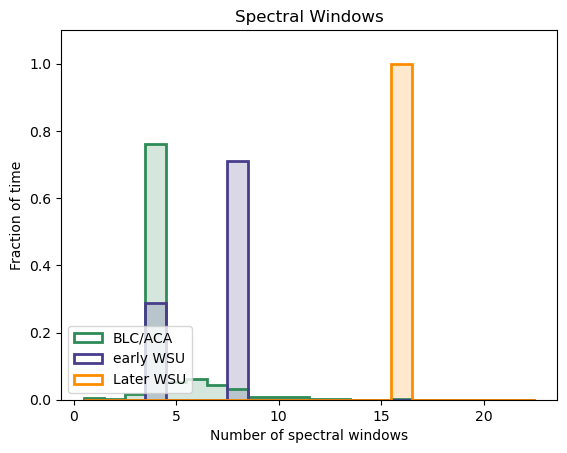

In [67]:
reload(wsu_plots)
wsu_plots.plot_spw_hist_all(wsu_all,bin_min=1,bin_max=23,nbin=22,
                           title='Spectral Windows',
                           pltname='plots/nspw_all.png')

## plot productsizes

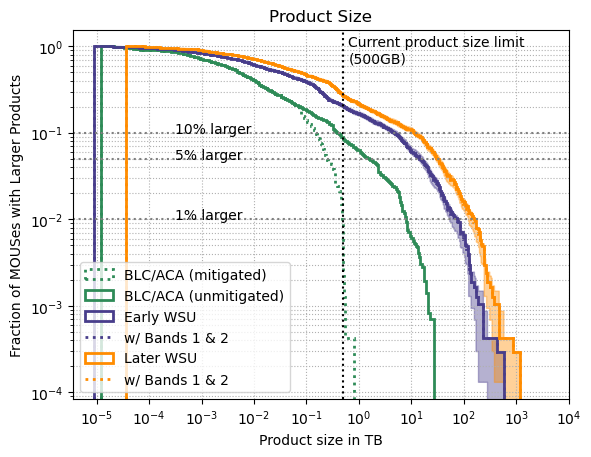

In [68]:
reload(wsu_plots)
wsu_plots.plot_productsize_comparison(wsu_all,
                                      band1_band2_estimate = band1_band2_agg['hist_cumulative'],
                                      figname='plots/productsize_distribution.png')

In [69]:
np.max(wsu_all['wsu_productsize_later_4x_stepped2'].to('TB'))

<Quantity 1159.29177043 Tbyte>

In [70]:
bin_max=2000
nbin=100

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1306: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


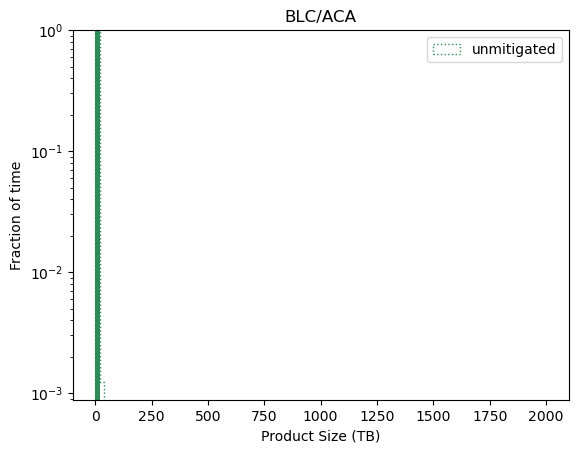

In [71]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='mitigatedprodsize',
                                       title='BLC/ACA',
                                       add_wavg=True,
                                      pltname='plots/productsize_blc.png')

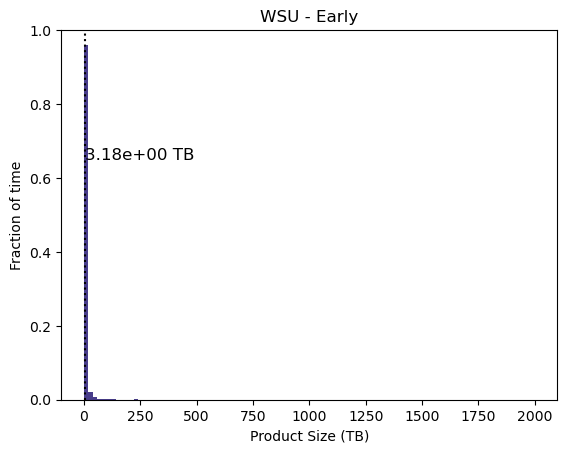

In [72]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                       log=False,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_early_stepped2',
                                       title='WSU - Early',
                                       add_wavg=True,
                                      pltname='plots/productsize_early_linear.png')

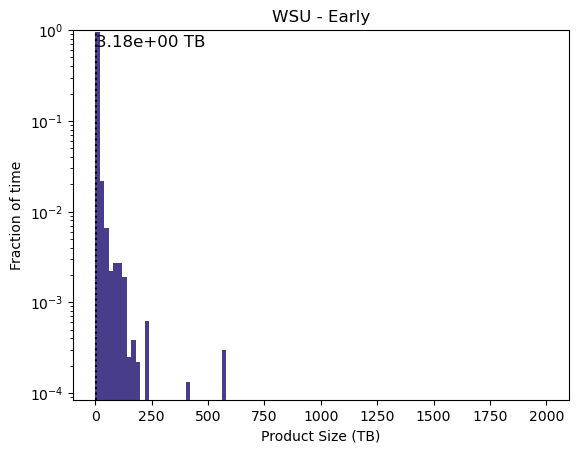

In [73]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_early_stepped2',
                                       title='WSU - Early',
                                       add_wavg=True,
                                      pltname='plots/productsize_early.png')

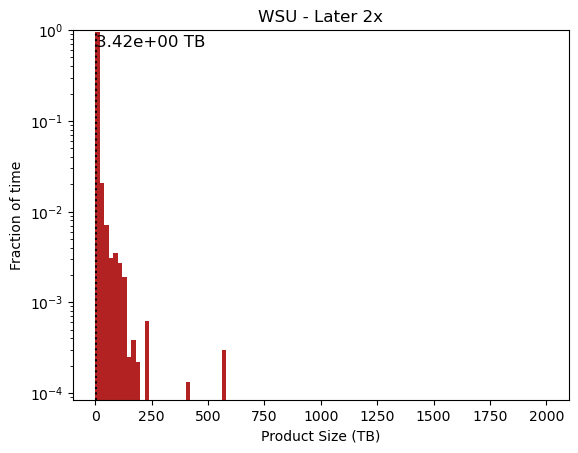

In [74]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_later_2x_stepped2',
                                       title='WSU - Later 2x',
                                       add_wavg=True,
                                      pltname='plots/productsize_later_2x.png')

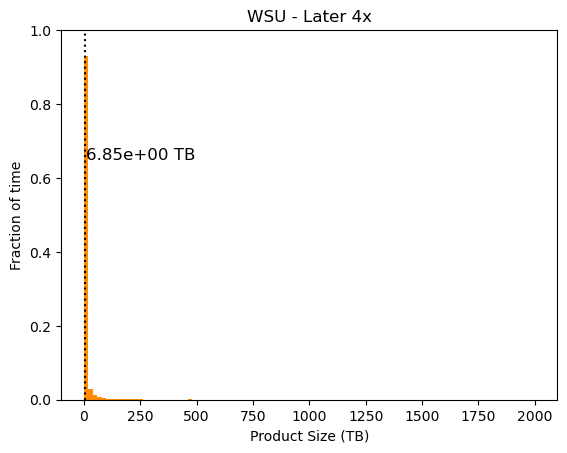

In [75]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                       log=False,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_later_4x_stepped2',
                                       title='WSU - Later 4x',
                                       add_wavg=True,
                                      pltname='plots/productsize_later_4x_linear.png')

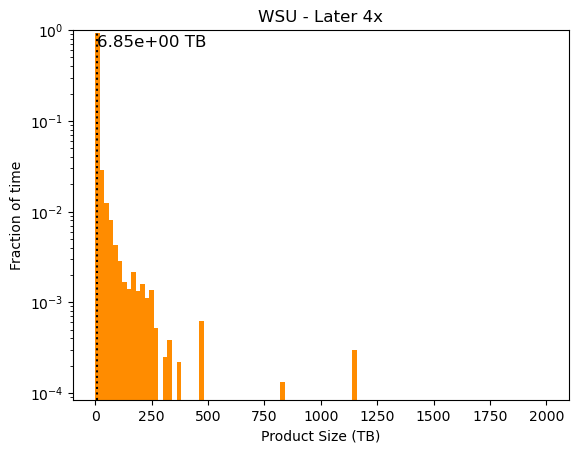

In [76]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_later_4x_stepped2',
                                       title='WSU - Later 4x',
                                       add_wavg=True,
                                      pltname='plots/productsize_later_4x.png')

In [77]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

maximum ratio
1899.834265620094
median ratio
3.9409444758364307


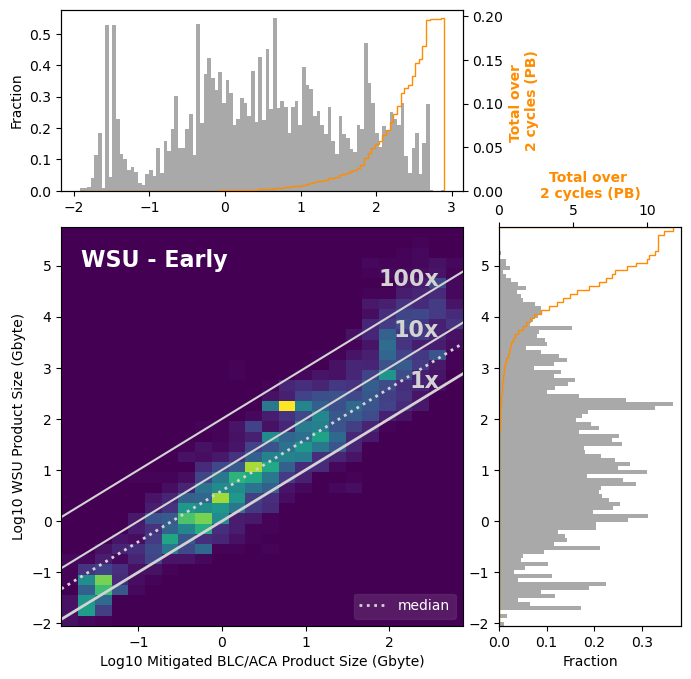

In [78]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all,stage='early', plot_title='WSU - Early',
                                 blc_mitigated=True, wsu_mitigated=False,
                                     pltname='plots/productsize_comparison_early.png')

maximum ratio
1899.834265620094
median ratio
4.5933362483789235


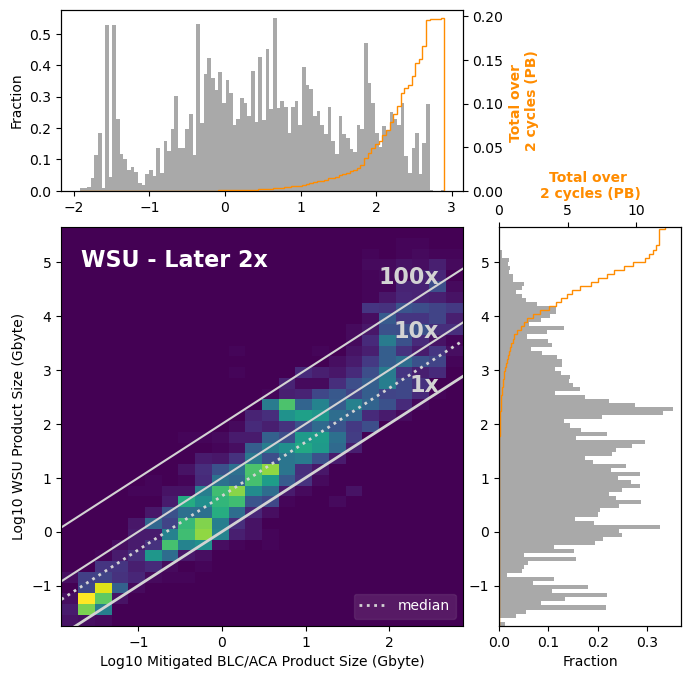

In [79]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all,stage='later_2x', plot_title='WSU - Later 2x',
                                 blc_mitigated=True, wsu_mitigated=False,
                                     pltname='plots/productsize_comparison_later_2x.png')

maximum ratio
3799.668531240188
median ratio
9.186672496757847


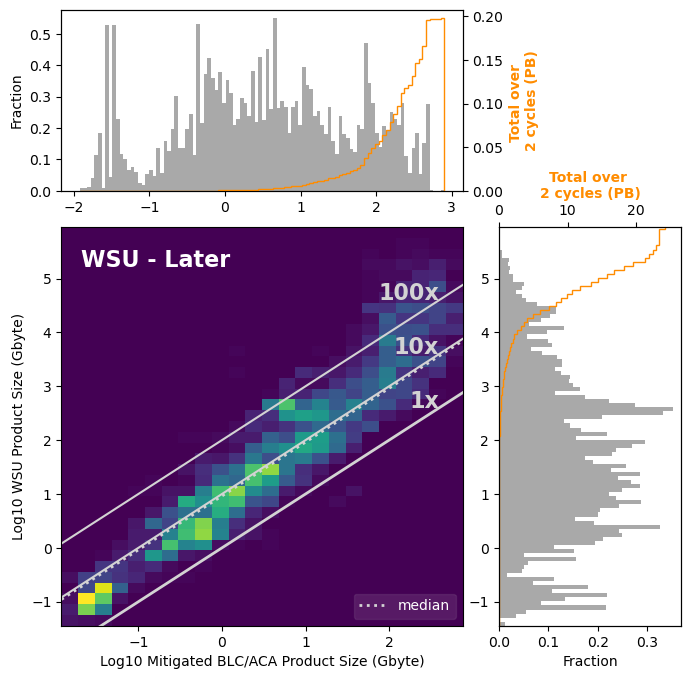

In [80]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all,stage='later_4x', plot_title='WSU - Later',
                                 blc_mitigated=True, wsu_mitigated=False,
                                     pltname='plots/productsize_comparison_later_4x.png')

median ratio
3.9409444758364307
max ratio
1899.834265620094
log10 (peak)
0.4022406559801345
peak
2.524879498585375


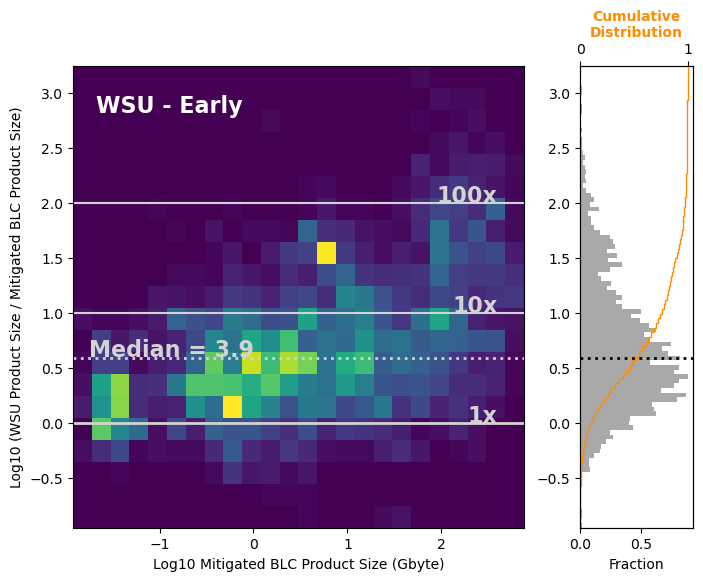

In [81]:
reload(wsu_plots)
wsu_plots.productsize_ratio_hist_plot(wsu_all,stage='early', plot_title='WSU - Early',
                                 blc_mitigated=True, wsu_mitigated=False,
                                pltname='plots/productsize_ratio_early.png')

median ratio
4.5933362483789235
max ratio
1899.834265620094
log10 (peak)
0.23596896003105994
peak
1.7217455137006776


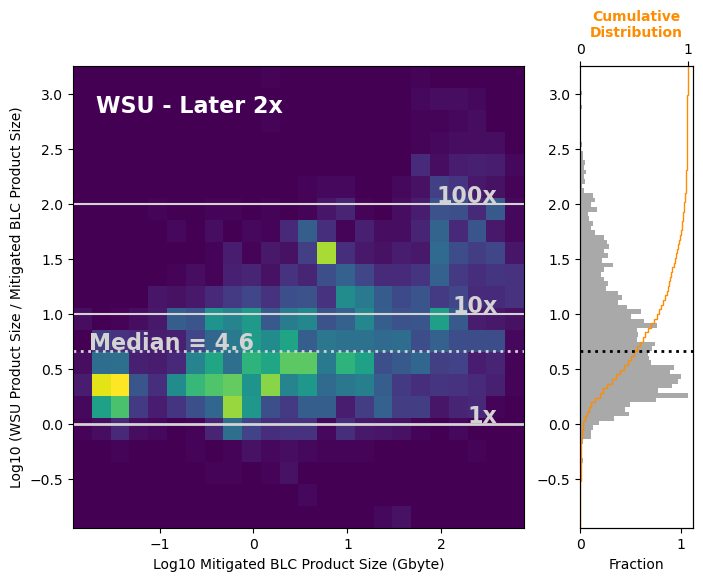

In [82]:
reload(wsu_plots)
wsu_plots.productsize_ratio_hist_plot(wsu_all,stage='later_2x', plot_title='WSU - Later 2x',
                                 blc_mitigated=True, wsu_mitigated=False,
                                pltname='plots/productsize_ratio_later_2x.png')

median ratio
9.186672496757847
max ratio
3799.668531240188
log10 (peak)
0.5369989556950411
peak
3.443491027401355


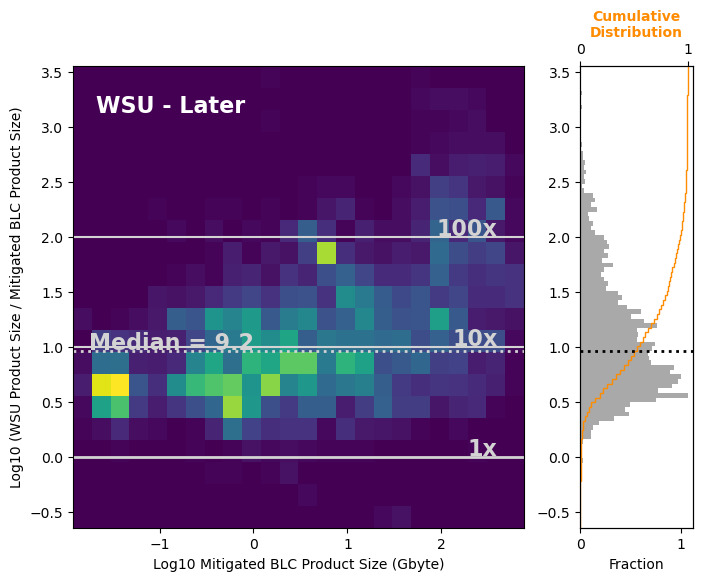

In [83]:
reload(wsu_plots)
wsu_plots.productsize_ratio_hist_plot(wsu_all,stage='later_4x', plot_title='WSU - Later',
                                 blc_mitigated=True, wsu_mitigated=False,
                                pltname='plots/productsize_ratio_later_4x.png')

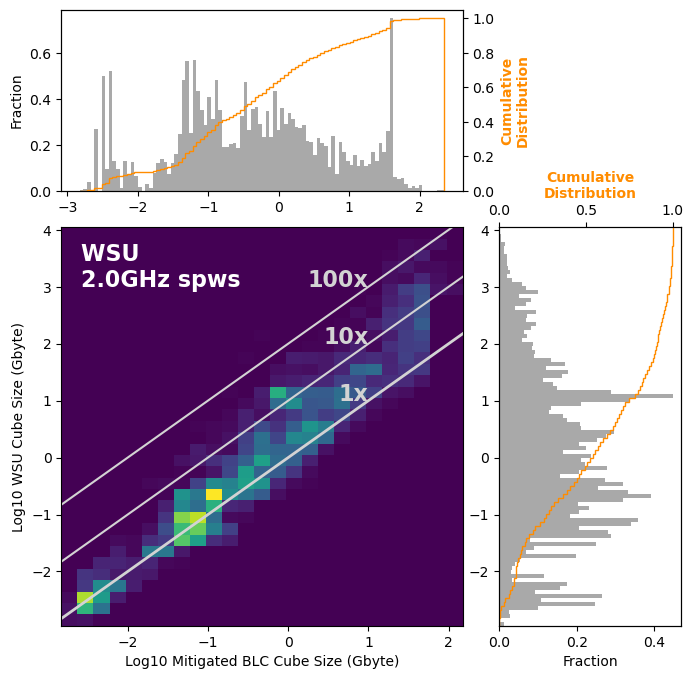

In [84]:
reload(wsu_plots)
wsu_plots.cubesize_comparison_hist_plot(wsu_all,plot_title='WSU \n2.0GHz spws',
                              blc_mitigated=True,wsu_mitigated=False,
                                  pltname='plots/cubesize_comparison.png')

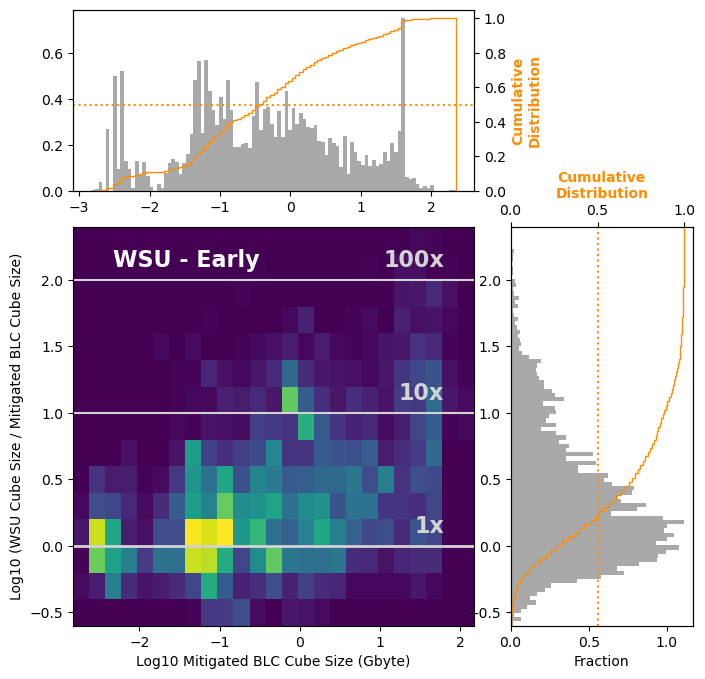

In [85]:
reload(wsu_plots)
wsu_plots.cubesize_ratio_hist_plot(wsu_all,plot_title='WSU - Early',
                              blc_mitigated=True,wsu_mitigated=False,
                              pltname='plots/cubesize_ratio.png')

In [86]:
wsu_all_src.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_lat

In [87]:
ratio = wsu_all['wsu_productsize_early_stepped2'].value/wsu_all['mitigatedprodsize'].value.filled(np.nan)

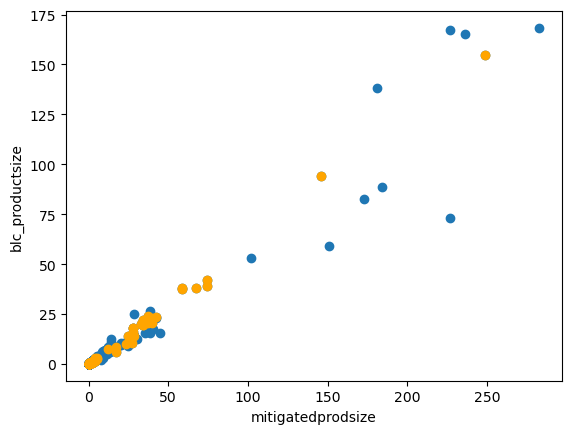

In [88]:
idx = ratio < 1.0

plt.scatter(wsu_all[idx]['mitigatedprodsize'].value.filled(np.nan), 
            wsu_all[idx]['blc_productsize'].value)
plt.xlabel('mitigatedprodsize')

plt.ylabel('blc_productsize')

idx2 = (wsu_all['ntarget'] > 1) & (ratio < 1.0)
plt.scatter(wsu_all[idx2]['mitigatedprodsize'].value.filled(np.nan),
           wsu_all[idx2]['blc_productsize'].value,color='orange')
## BLC with ntargest > 1 is off.

94


Text(0, 0.5, 'wsu_productsize_early_stepped2')

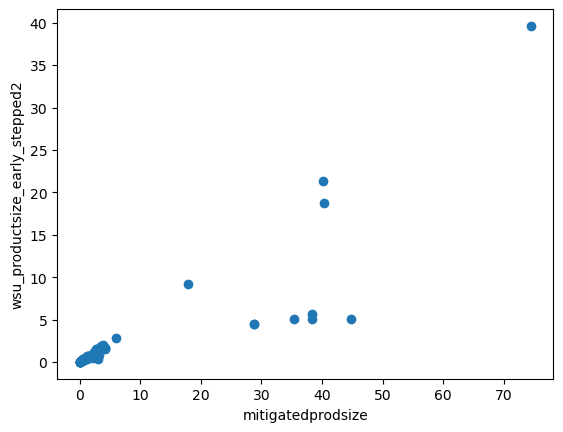

In [89]:
idx = ratio < 0.55
print(np.sum(idx))
plt.scatter(wsu_all[idx]['mitigatedprodsize'],wsu_all[idx]['wsu_productsize_early_stepped2'])
plt.xlabel('mitigatedprodsize')
plt.ylabel('wsu_productsize_early_stepped2')

In [90]:
idx = (ratio< 0.55) & ( wsu_all['mitigatedprodsize'].value.filled(np.nan) > 20) & (wsu_all['wsu_productsize_early_stepped2'].value < 8.0)
wsu_all[idx]['proposal_id','mous','ntarget','imsize','blc_bandwidth_agg','blc_ntunings','mitigatedcubesize','mitigatedprodsize','blc_productsize',
             'wsu_nspw_early','wsu_cubesize_stepped2','mfssize','wsu_productsize_early_stepped2']

<QTable length=6>
 proposal_id            mous         ... wsu_productsize_early_stepped2
                                     ...             Gbyte             
    str14              str22         ...            float64            
-------------- --------------------- ... ------------------------------
2021.1.01543.S uid://A001/X158f/X142 ...                      5.0577408
2021.1.01543.S uid://A001/X158f/X146 ...                      5.7097152
2021.1.01543.S uid://A001/X158f/X14a ...                      5.0577408
2021.1.01543.S uid://A001/X158f/X166 ...             4.4452799999999995
2021.1.01543.S  uid://A001/X15b8/X39 ...                      5.0577408
2021.1.01543.S  uid://A001/X15b8/X55 ...             4.4452799999999995

The difference is for a BLC data set that is a multi-tuning data set, which has 5 tunings that spans 37.5 GHz. To potentially make directly comparable, I might have to assume multiple tunings for the WSU.

For the other difference cases, there are very small imsizes (few hundred) that I'm estimating to be too low compared to the value the pipeline determines. 

## plot increase in number of visibilities

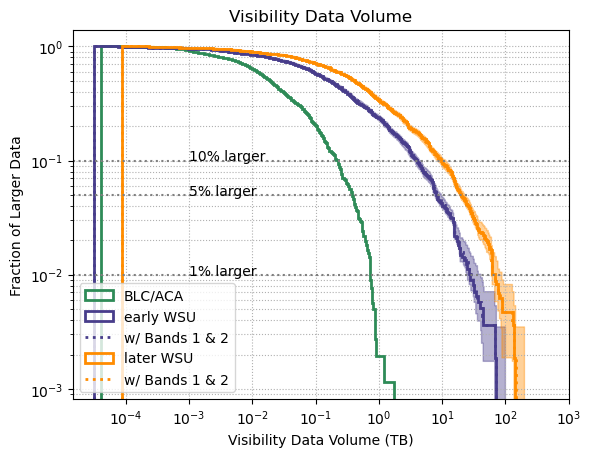

In [91]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison(wsu_all,
                                  band1_band2_estimate = band1_band2_agg['hist_cumulative'],
                                  plot_title='Visibility Data Volume',
                                  figname='plots/datavol_distribution.png')

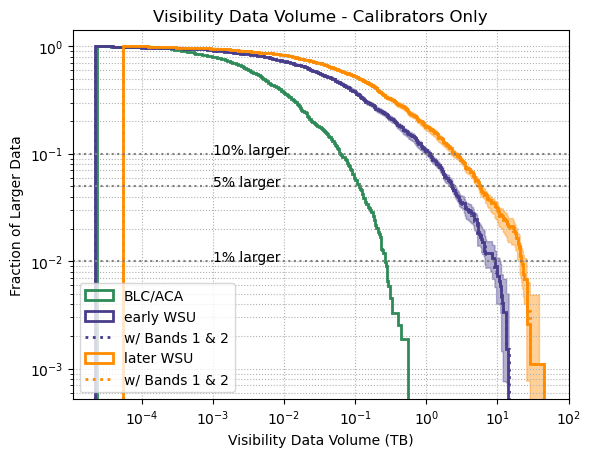

In [92]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison(wsu_all,
                                  datatype='cal',
                                  band1_band2_estimate = band1_band2_agg['hist_cumulative'],
                                  plot_title='Visibility Data Volume - Calibrators Only' ,
                                  figname='plots/datavol_distribution_cal.png')

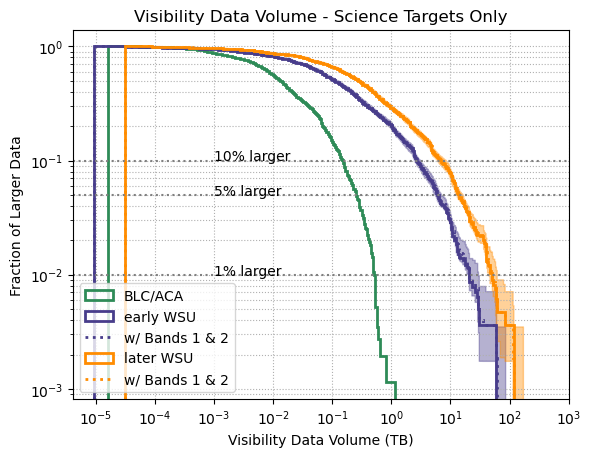

In [93]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison(wsu_all,
                                  datatype='target_tot',
                                  band1_band2_estimate = band1_band2_agg['hist_cumulative'],
                                  plot_title='Visibility Data Volume - Science Targets Only' ,
                                  figname='plots/datavol_distribution_target_tot.png')

In [94]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [95]:
np.max(wsu_all['wsu_datavol_later_4x_stepped2_typical_total']).to('TB')

<Quantity 143.24890953 Tbyte>

In [96]:
nbin=100
bin_max=250

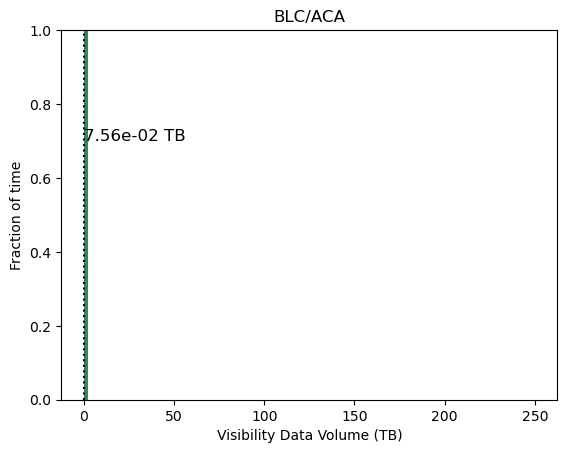

In [97]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,log=False,
                            nbin=nbin,
                            data_val = 'blc_datavol_typical_total',
                            title='BLC/ACA',
                            add_wavg=True,
                            pltname='plots/datavol_blc.png')

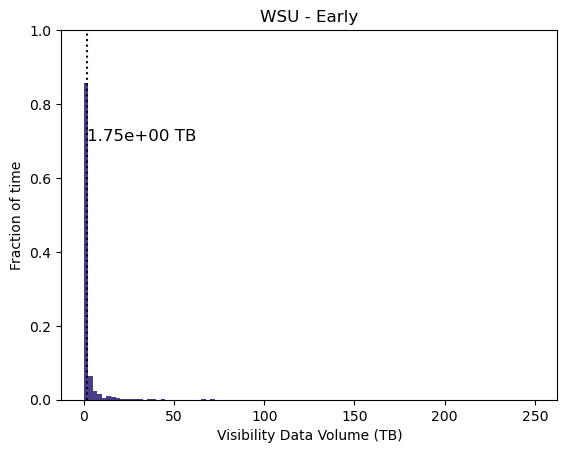

In [98]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250, log=False,
                        nbin=nbin,
                        data_val = 'wsu_datavol_early_stepped2_typical_total',
                            title='WSU - Early',
                        add_wavg=True,
                                  pltname='plots/datavol_early_linear.png')

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1819: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))


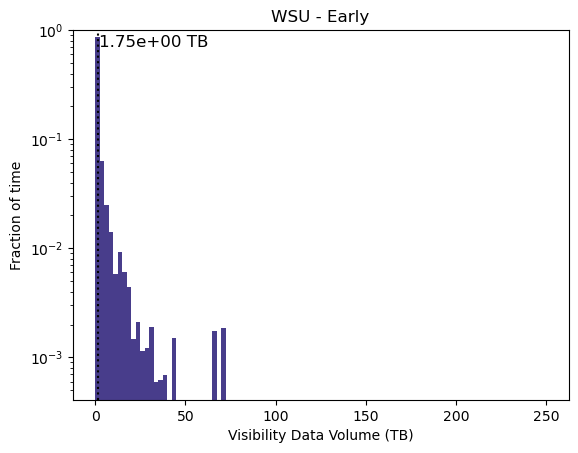

In [99]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                        nbin=nbin,
                        data_val = 'wsu_datavol_early_stepped2_typical_total',
                            title='WSU - Early',
                        add_wavg=True,
                                  pltname='plots/datavol_early.png')

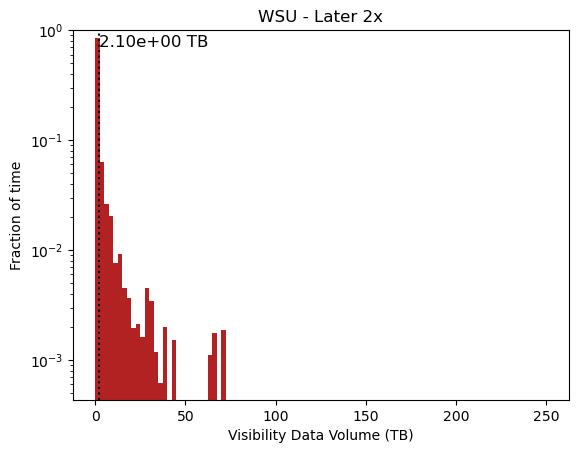

In [100]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                        nbin=nbin,
                        data_val = 'wsu_datavol_later_2x_stepped2_typical_total',
                            title='WSU - Later 2x',
                        add_wavg=True,
                                  pltname='plots/datavol_later_2x.png')

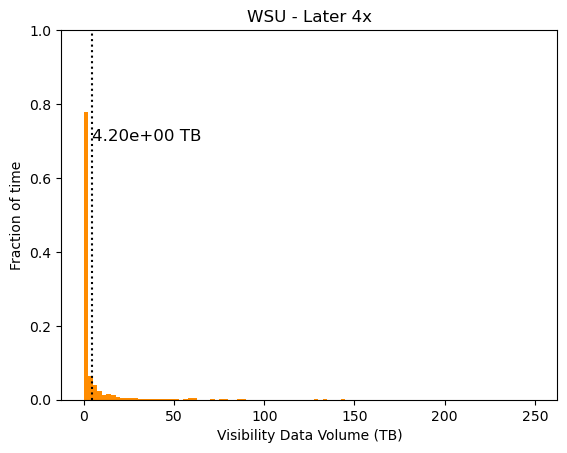

In [101]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,log=False,
                        nbin=nbin,
                        data_val = 'wsu_datavol_later_4x_stepped2_typical_total',
                            title='WSU - Later 4x',
                        add_wavg=True,
                                  pltname='plots/datavol_later_4x_linear.png')

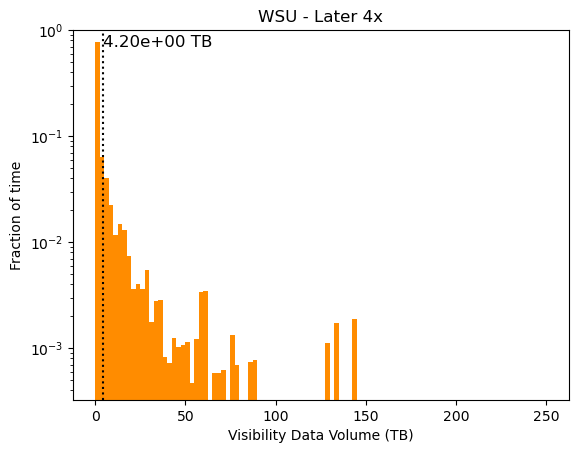

In [102]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                        nbin=nbin,
                        data_val = 'wsu_datavol_later_4x_stepped2_typical_total',
                            title='WSU - Later 4x',
                        add_wavg=True,
                                  pltname='plots/datavol_later_4x.png')

Median Ratio
7.031901041666668
Max Ratio
258.5659906914894


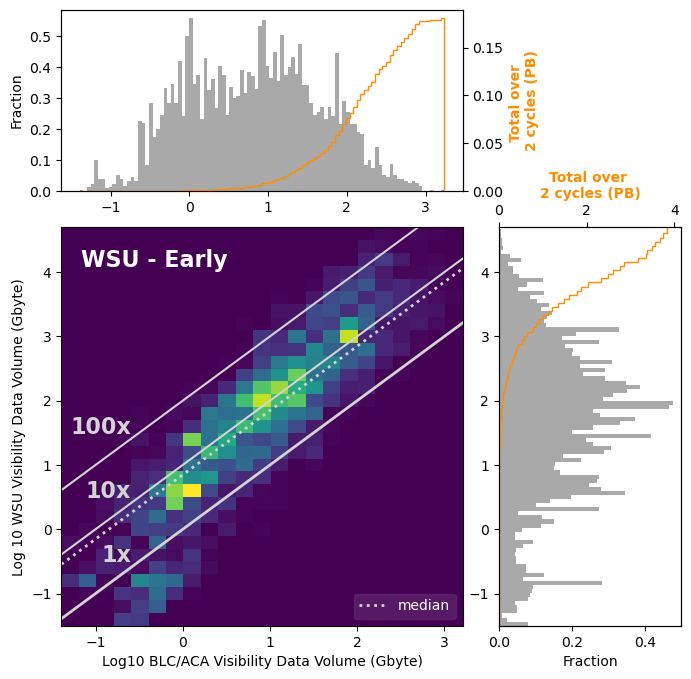

In [103]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all,stage='early',plot_title='WSU - Early',
                                         pltname='plots/datavol_comparison_early.png')

Sergio brought up the question that we have some WSU visibility volumes that are less than the BLC visibility volumes. These are mainly low nchan projects from the 7m array which have a smaller tint than the 10.08s I assume for the 7m array currently.

In [104]:
ratio = wsu_all['wsu_datavol_early_stepped2_typical_total'].value/wsu_all['blc_datavol_typical_total'].value

In [105]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [106]:
idx = (ratio < 0.5) & (wsu_all['blc_datavol_typical_total'].value > 2)
wsu_all[idx]['proposal_id','mous','schedblock_name','array','wsu_datavol_early_stepped2_typical_total','blc_datavol_typical_total','blc_nchan_agg','wsu_nchan_spw_stepped2','wsu_nspw_early','blc_tint','wsu_tint','blc_velres','wsu_velres_stepped2']

<QTable length=23>
 proposal_id            mous          ... wsu_velres_stepped2
                                      ...        km / s      
    str14              str22          ...       float64      
-------------- ---------------------- ... -------------------
2019.1.00700.S uid://A001/X1465/X27f9 ...   9.994690396455017
2019.1.00203.S uid://A001/X1465/X36ce ...   9.992169512900206
2019.1.01832.S   uid://A001/X1465/X41 ...   9.999463020996053
2019.1.01427.S  uid://A001/X1465/Xd55 ...    9.99883278610994
2019.2.00167.S  uid://A001/X14c2/X13c ...   9.993267806519423
2019.2.00167.S  uid://A001/X14c2/X140 ...   9.994250588666457
           ...                    ... ...                 ...
2021.1.01209.S  uid://A001/X15bf/X140 ...   9.987548155871194
2021.1.01209.S   uid://A001/X2df9/X4f ...   9.987471514466625
2021.1.01209.S   uid://A001/X2df9/X52 ...   9.987479932565748
2021.1.01209.S   uid://A001/X2df9/X55 ...   9.987460432726225
2021.1.01209.S  uid://A001/X2dfa/X197 ...    9.98712792437544
2021.1.01209.S   uid://A001/X2dfa/X8b ...   9.987711633763341

In [107]:
idx = wsu_all['mous'] == 'uid://A001/X1465/X41'
wsu_all[idx]['target_time_tot','cal_time','time_tot','wsu_datavol_early_stepped2_typical_total','wsu_datavol_early_stepped2_typical_target_tot','wsu_datavol_early_stepped2_typical_cal']

<QTable length=1>
 target_time_tot       cal_time      ... wsu_datavol_early_stepped2_typical_cal
        s                 s          ...                 Gbyte                 
     float64           float64       ...                float64                
----------------- ------------------ ... --------------------------------------
32798.30399999987 19293.120000000003 ...                      0.857059753846154

In [108]:
wsu_all_src.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_lat

In [109]:
idx = wsu_all_src['mous'] == 'uid://A001/X1465/X41'
wsu_all_src[idx]['array','wsu_nchan_spw_stepped2','wsu_nspw_early','blc_datarate_typical','blc_tint','wsu_datarate_early_stepped2_typical','wsu_tint']

<Table length=29>
array wsu_nchan_spw_stepped2 ... wsu_datarate_early_stepped2_typical wsu_tint
                             ...              Gbyte / s                 s    
 str3        float64         ...               float64               float64 
----- ---------------------- ... ----------------------------------- --------
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984
  ...                    ... ...                                 ...      ...
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984
   7m                  126.0 ...               4.442307692307692e-05    9.984

Big difference here is that blc_datarate is different because the blc_int is 1.008s instead of 10.08s as we assume for wsu_tint.

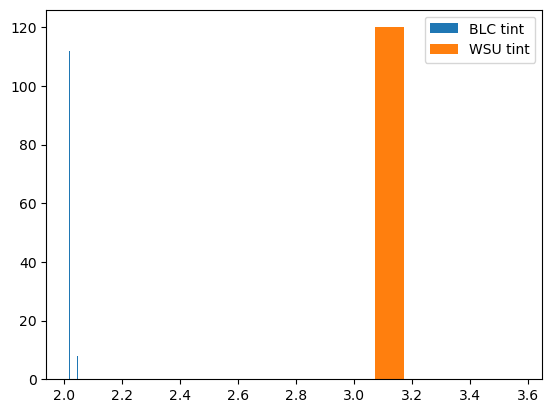

In [110]:
idx = (ratio < 1.0)  & (wsu_all['array'] == '12m')
plt.hist(wsu_all[idx]['blc_tint'].value,label='BLC tint')
plt.hist(wsu_all[idx]['wsu_tint'].value,label='WSU tint')
plt.legend()

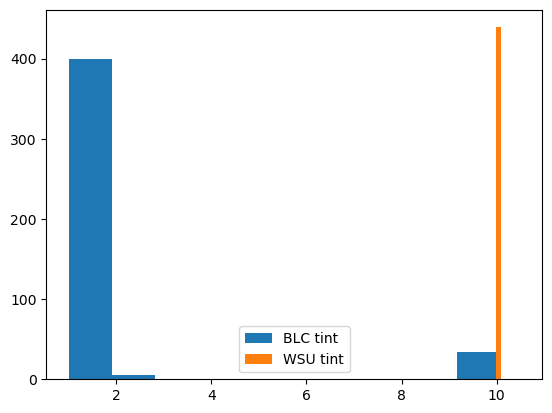

In [111]:
idx = (ratio < 1.0)  & (wsu_all['array'] == '7m')
plt.hist(wsu_all[idx]['blc_tint'].value,label='BLC tint')
plt.hist(wsu_all[idx]['wsu_tint'].value,label='WSU tint')
plt.legend()

Median Ratio
9.203906250000001
Max Ratio
347.203125


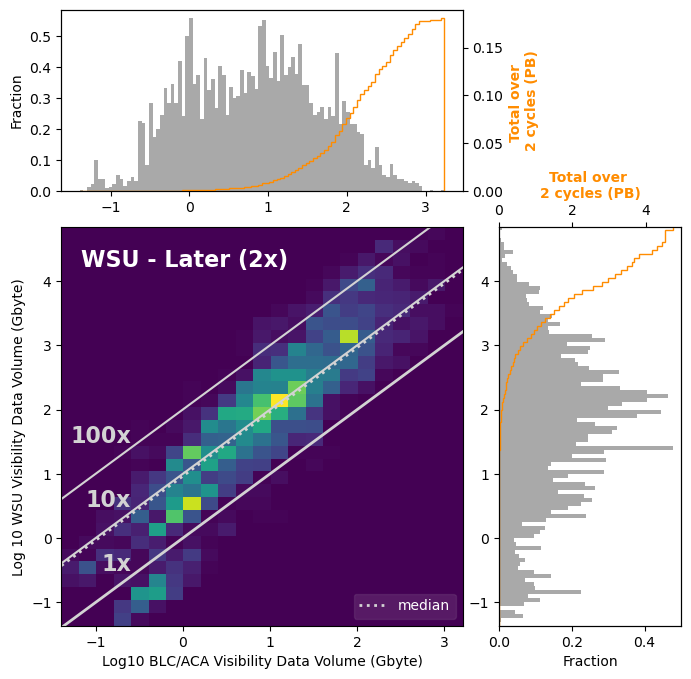

In [112]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all,stage='later_2x',plot_title='WSU - Later (2x)',
                                         pltname='plots/datavol_comparison_later_2x.png')

Median Ratio
18.407812500000002
Max Ratio
694.40625


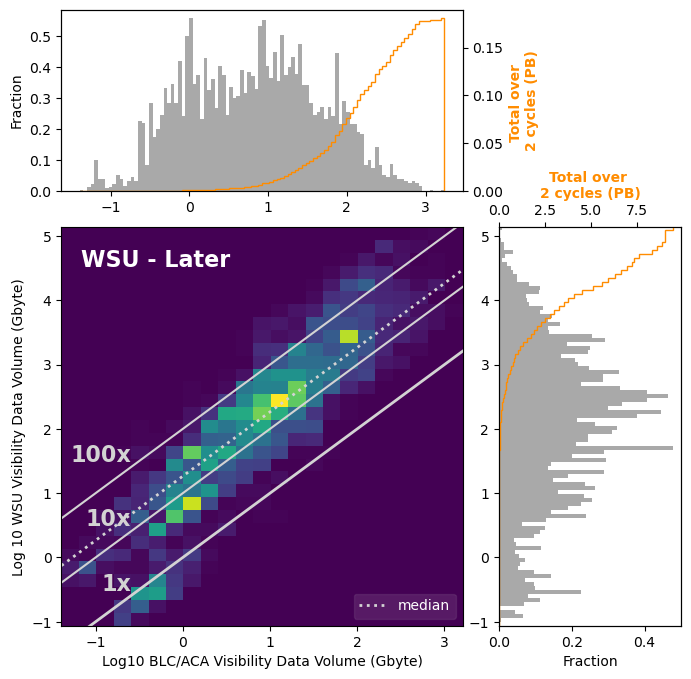

In [113]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all,stage='later_4x',plot_title='WSU - Later',
                                         pltname='plots/datavol_comparison_later_4x.png')

median ratio
7.031901041666668
max ratio
258.5659906914894


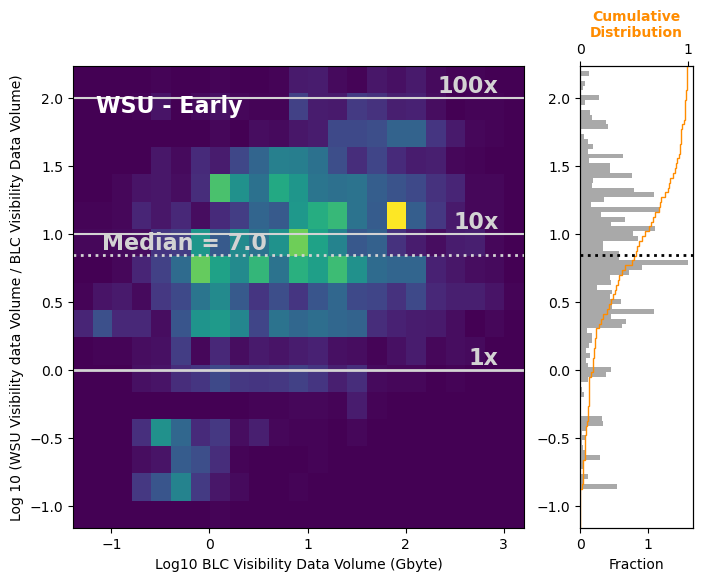

In [114]:
reload(wsu_plots)
wsu_plots.visibility_size_ratio_hist_plot(wsu_all,stage='early',plot_title='WSU - Early',
                                         pltname='plots/datavol_ratio_early.png')

median ratio
9.203906250000001
max ratio
347.203125


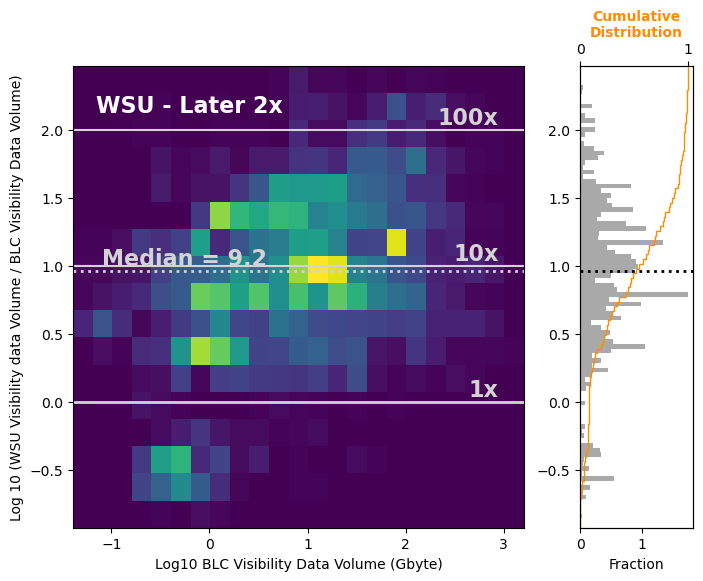

In [115]:
reload(wsu_plots)
wsu_plots.visibility_size_ratio_hist_plot(wsu_all,stage='later_2x',plot_title='WSU - Later 2x',
                                         pltname='plots/datavol_ratio_later_2x.png')

median ratio
18.407812500000002
max ratio
694.40625


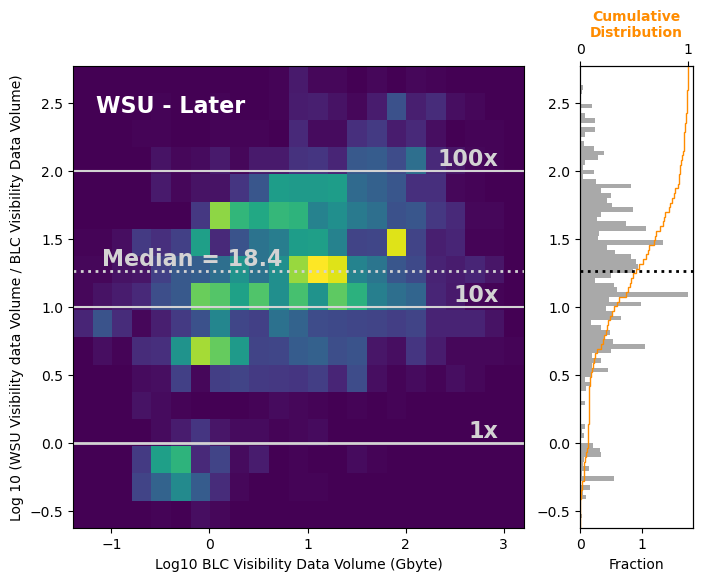

In [116]:
reload(wsu_plots)
wsu_plots.visibility_size_ratio_hist_plot(wsu_all,stage='later_4x',plot_title='WSU - Later',
                                         pltname='plots/datavol_ratio_later_4x.png')

## plot data rate

In [117]:
# calcualting some fiducial data rates
from wsu_db import calc_datarate, calc_visrate

In [118]:
## 12M, typical nant = 47, and tint=3.024 and 595200.00 channels (band 2 spectral scan - 2x bandwidth)
calc_datarate(2, 1, 47, 595200.0,2,3.024)

<Quantity 1.77615238 Gbyte>

In [119]:
## 12M, typical nant = 47, and tint=3.024 and 595200.00 channels (band 2 spectral scan - 2x bandwidth)
calc_visrate(47, 2, 595200.0, 3.024*u.s)

<Quantity 3063.86285714 Gvis / h>

In [120]:
## 12M, typical nant = 47, and tint=3.024 and 1190400.00 channels (band 2 spectral scan - 4x bandwidth)
calc_datarate(2, 1, 47, 1190400.0,2,3.024)

<Quantity 3.55230476 Gbyte>

In [121]:
## 12M, typical nant = 47, and tint=3.024 and 1190400.00 channels (band 2 spectral scan - 4x bandwidth)
calc_visrate(47, 2, 1190400.0, 3.024*u.s)

<Quantity 6127.72571429 Gvis / h>

In [122]:
## 12M, typical nant = 47, and tint=3.024 and 148800.0 -- 500MB/s limit
calc_datarate(2, 1, 47, 148800.0,2,3.024)

<Quantity 0.4440381 Gbyte>

In [123]:
# 12m, typical nant=47, tint=3.024s and 148800.0 -- 500 MB/s limit
calc_visrate(47, 2, 148800.0, 3.024*u.s)

<Quantity 765.96571429 Gvis / h>

In [124]:
## 12M, typical nant = 47, and tint=3.024 and 49600.00 -- 160MB/s limit
calc_datarate(2, 1, 47, 49600.0,2,3.024)

<Quantity 0.1480127 Gbyte>

In [125]:
# 12m, typical nant=47, tint=3.024s and 49600.0 -- 160 MB/s limit
calc_visrate(47, 2, 49600.0, 3.024*u.s)

<Quantity 255.32190476 Gvis / h>

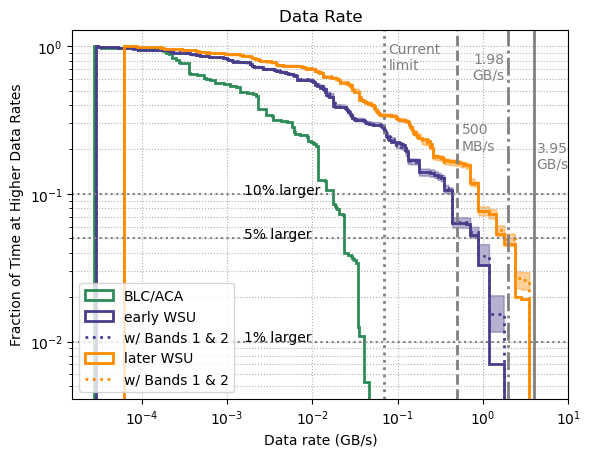

In [126]:
reload(wsu_plots)
wsu_plots.plot_datarate_comparison(wsu_all,
                                   add_band2_specscan=False,
                                   figname='plots/datarate_distribution.png',
                                   band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                   add_tech_limits=True)

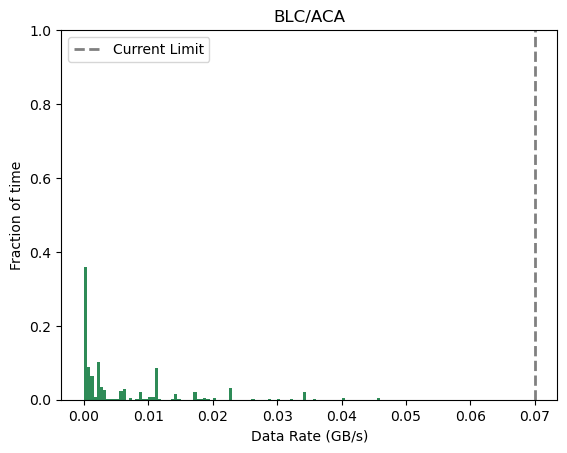

In [127]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=0.05, nbin=100,
                                   data_val= 'blc_datarate_typical',
                                   log=False,
                                   title='BLC/ACA',
                                   add_wavg=False,
                                   limit=0.070, #GB/s
                                   limit_label = 'Current Limit',
                                   pltname='plots/datarate_blc_zoomin_linear.png')

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:2082: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))


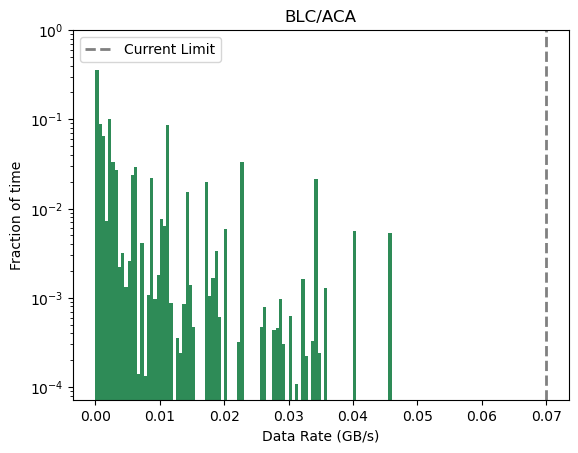

In [128]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=0.05, nbin=100,
                                    data_val='blc_datarate_typical',
                                    title='BLC/ACA',
                                    add_wavg=False,
                                    limit=0.070, #GB/s
                                    limit_label = 'Current Limit',
                                    #band1_band2_estimate=band1_band2_agg['hist'],
                                    pltname='plots/datarate_blc_zoomin.png')

In [129]:
bin_max=3.5
nbin=100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


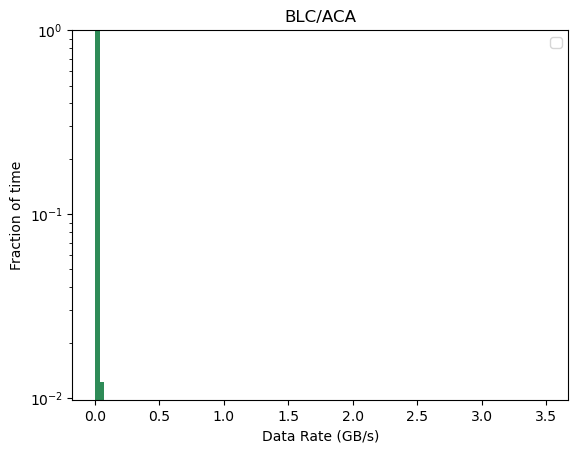

In [130]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'blc_datarate_typical',
                                   title='BLC/ACA',
                                   add_wavg=False,                                   
                                   pltname='plots/datarate_blc.png')

In [131]:
np.median(wsu_all['wsu_datarate_early_stepped2_typical']).to(u.MB/u.s)

<Quantity 14.4995 Mbyte / s>

In [132]:
np.max(wsu_all['wsu_datarate_early_stepped2_typical'])

<Quantity 1.740739 Gbyte / s>

In [133]:
np.median(wsu_all['wsu_datarate_later_2x_stepped2_typical']).to(u.MB/u.s)

<Quantity 14.993 Mbyte / s>

In [134]:
np.max(wsu_all['wsu_datarate_later_2x_stepped2_typical'])

<Quantity 1.740739 Gbyte / s>

In [135]:
np.median(wsu_all['wsu_datarate_later_4x_stepped2_typical']).to(u.MB/u.s)

<Quantity 29.986 Mbyte / s>

In [136]:
np.max(wsu_all['wsu_datarate_later_4x_stepped2_typical'])

<Quantity 3.481478 Gbyte / s>

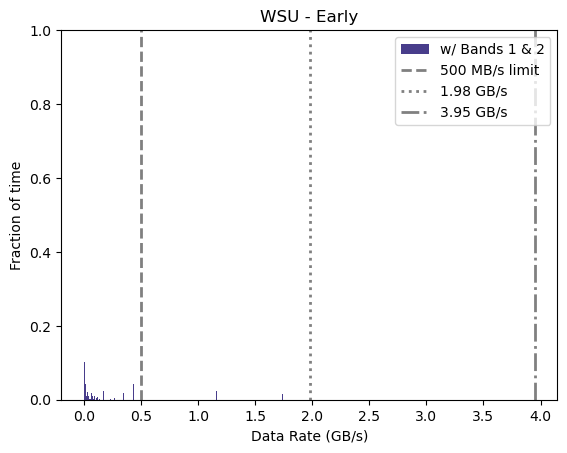

In [137]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'wsu_datarate_early_stepped2_typical',log=False,
                                   title='WSU - Early',
                                   add_wavg=False,
                                   limit=0.5, #MB/s
                                   limit_label='500 MB/s limit',
                                   add_band2_specscan=False,
                                   band1_band2_estimate=band1_band2_agg['hist'],
                                   pltname='plots/datarate_early_linear.png',
                                   add_tech_limits=True)

In [138]:
band1_band2_agg.keys()

dict_keys(['hist_cumulative', 'hist', 'hist_log'])

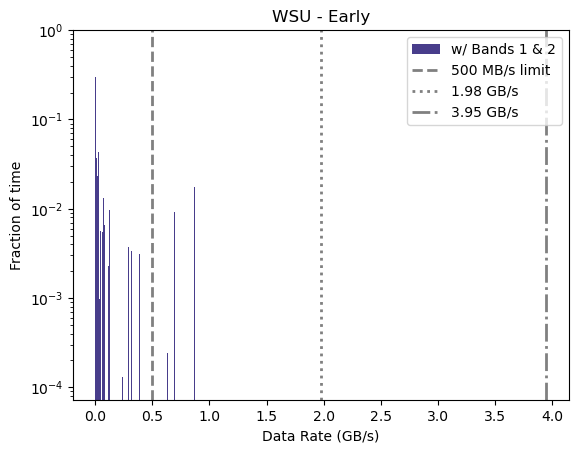

In [139]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'wsu_datarate_early_stepped2_typical',
                                   title='WSU - Early',
                                   add_wavg=False,
                                   limit=0.5, # MB/s
                                   limit_label='500 MB/s limit',
                                    add_band2_specscan=False,
                                    add_tech_limits=True,
                                    band1_band2_estimate=band1_band2_agg['hist_log'],
                                   pltname='plots/datarate_early.png')

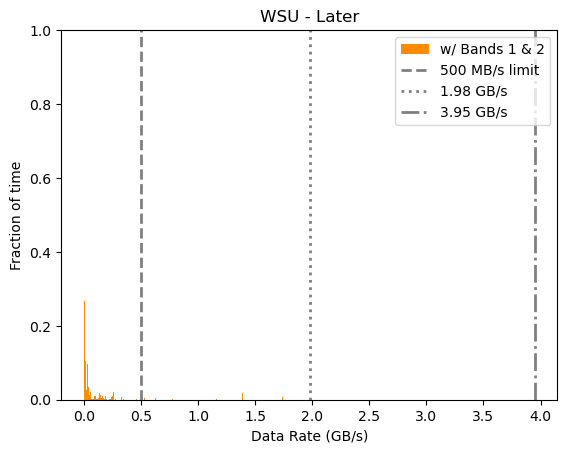

In [140]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,log=False,
                                   data_val= 'wsu_datarate_later_4x_stepped2_typical',
                                   title='WSU - Later',
                                   add_wavg=False,
                                    limit=0.5, # 500MB/s
                                   limit_label='500 MB/s limit',
                                    add_band2_specscan=False,
                                    add_tech_limits=True,
                                    band1_band2_estimate=band1_band2_agg['hist'],
                                   pltname='plots/datarate_later_4x_linear.png')

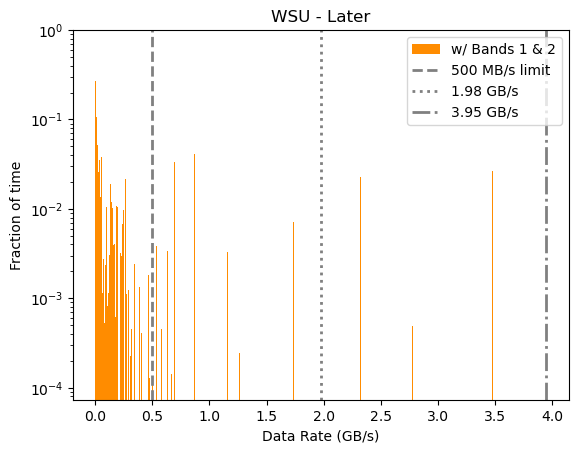

In [141]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,log=True,
                                   data_val= 'wsu_datarate_later_4x_stepped2_typical',
                                   title='WSU - Later',
                                   add_wavg=False,
                                   limit=0.5, # 500 MB/s
                                    limit_label='500 MB/s limit',
                                    add_band2_specscan=False,
                                    add_tech_limits=True,
                                    band1_band2_estimate=band1_band2_agg['hist_log'],
                                   pltname='plots/datarate_later_4x.png')

In [142]:
idx = wsu_all['wsu_datarate_later_4x_stepped2_typical'] > 4.0 * u.GB /u.s
wsu_all[idx]['mous','band','blc_npol','blc_velres','wsu_npol','wsu_freq','wsu_velres_stepped2','wsu_chanavg_stepped2','wsu_specwidth_stepped2']

<QTable length=0>
 mous   band  blc_npol ... wsu_chanavg_stepped2 wsu_specwidth_stepped2
                       ...                               kHz          
str22 float64  int64   ...       float64               float64        
----- ------- -------- ... -------------------- ----------------------

In [143]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

## Effect of data rate limits on science categories

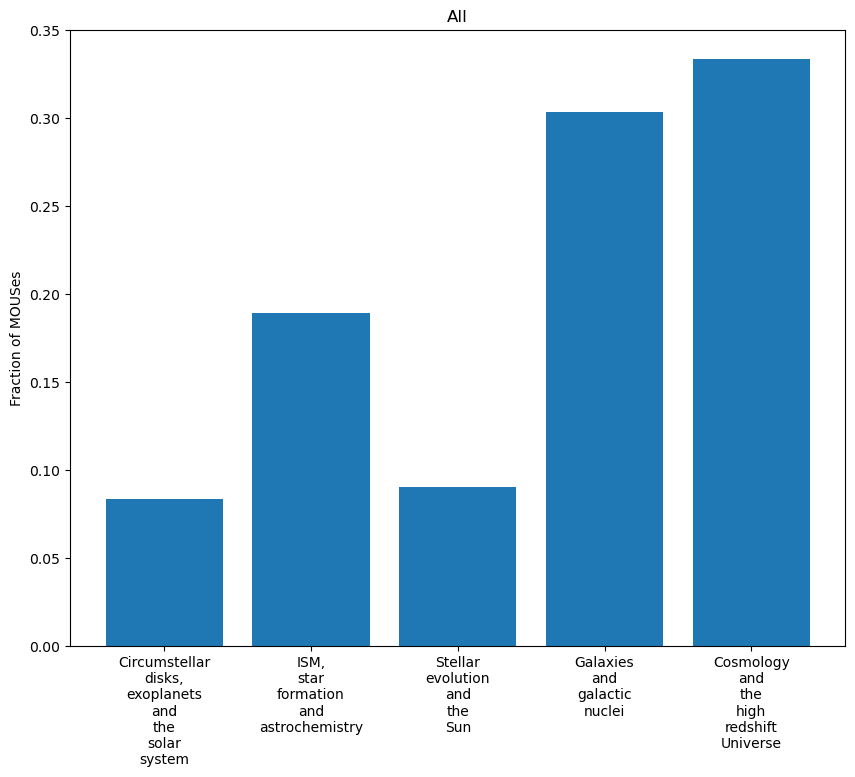

In [144]:
reload(wsu_plots)
wsu_plots.plot_scientific_category_distribution(band1_band2_rep, title='All')

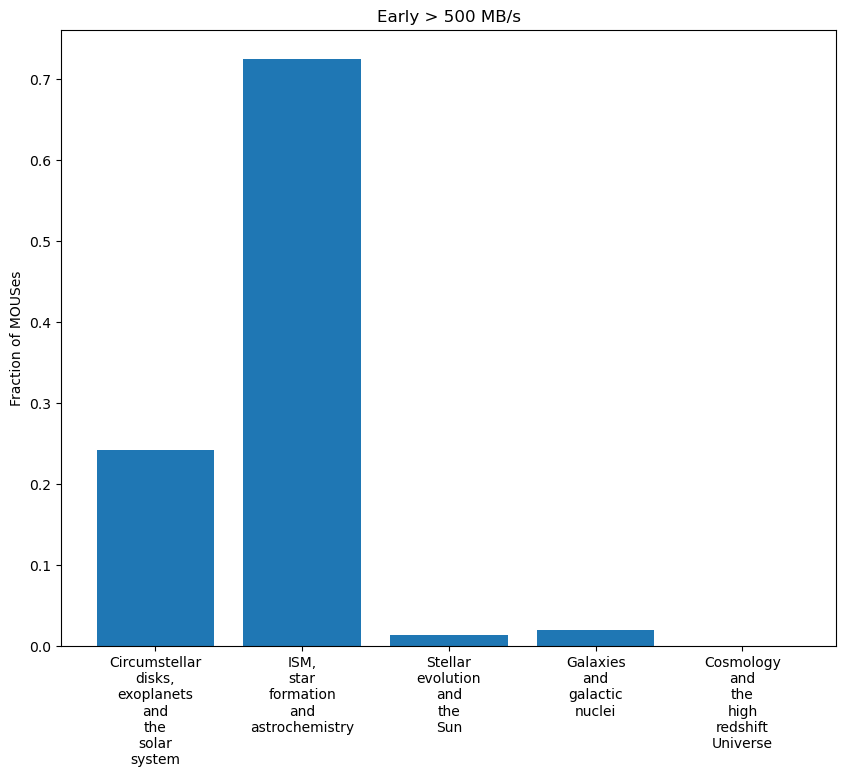

In [145]:
reload(wsu_plots)
idx = band1_band2_rep['wsu_datarate_early_stepped2_typical'] >= 500 * u.MB/u.s
wsu_plots.plot_scientific_category_distribution(band1_band2_rep[idx], title='Early > 500 MB/s')

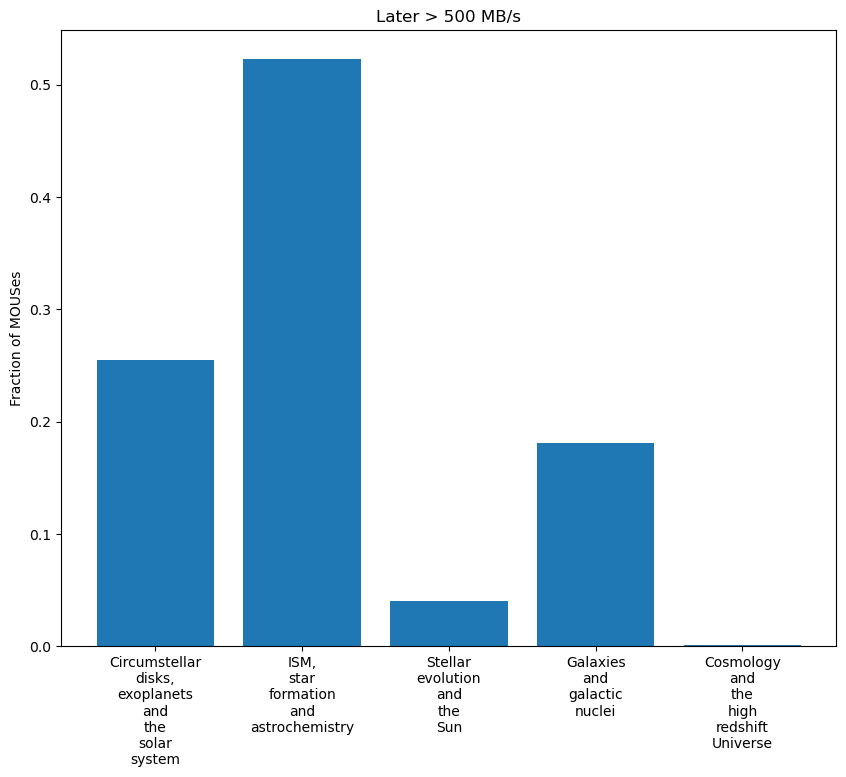

In [146]:
reload(wsu_plots)
idx = band1_band2_rep['wsu_datarate_later_4x_stepped2_typical'] >= 500 * u.MB/u.s
wsu_plots.plot_scientific_category_distribution(band1_band2_rep[idx], title='Later > 500 MB/s')

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:3150: RuntimeWarning: invalid value encountered in scalar divide
  mycat_count = np.sum(idx)/total


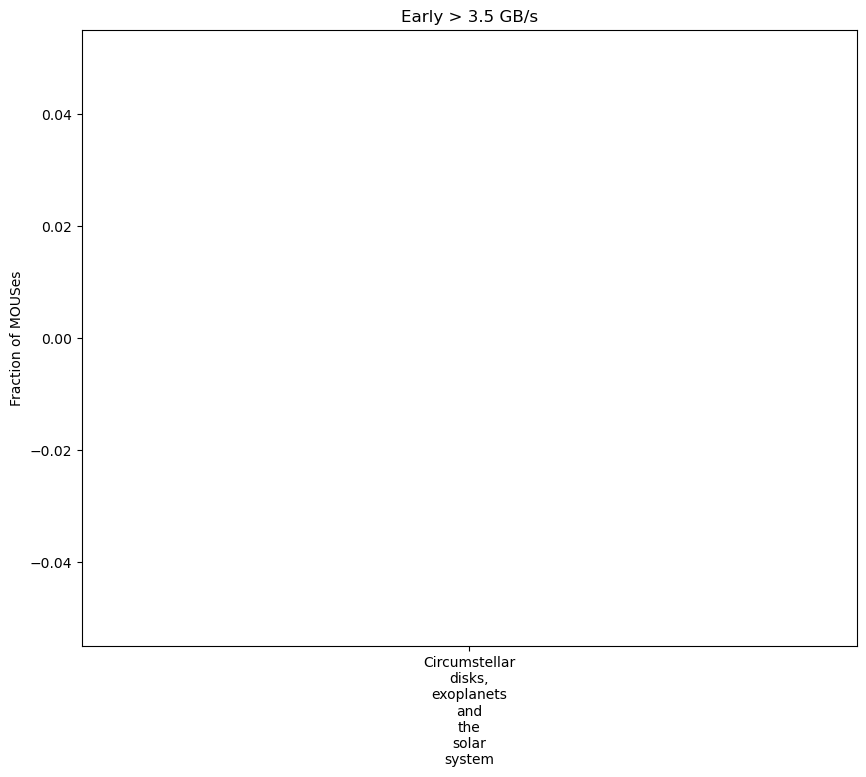

In [147]:
reload(wsu_plots)
idx = band1_band2_rep['wsu_datarate_early_stepped2_typical'] >= 3.5 * u.GB/u.s
wsu_plots.plot_scientific_category_distribution(band1_band2_rep[idx], title='Early > 3.5 GB/s')

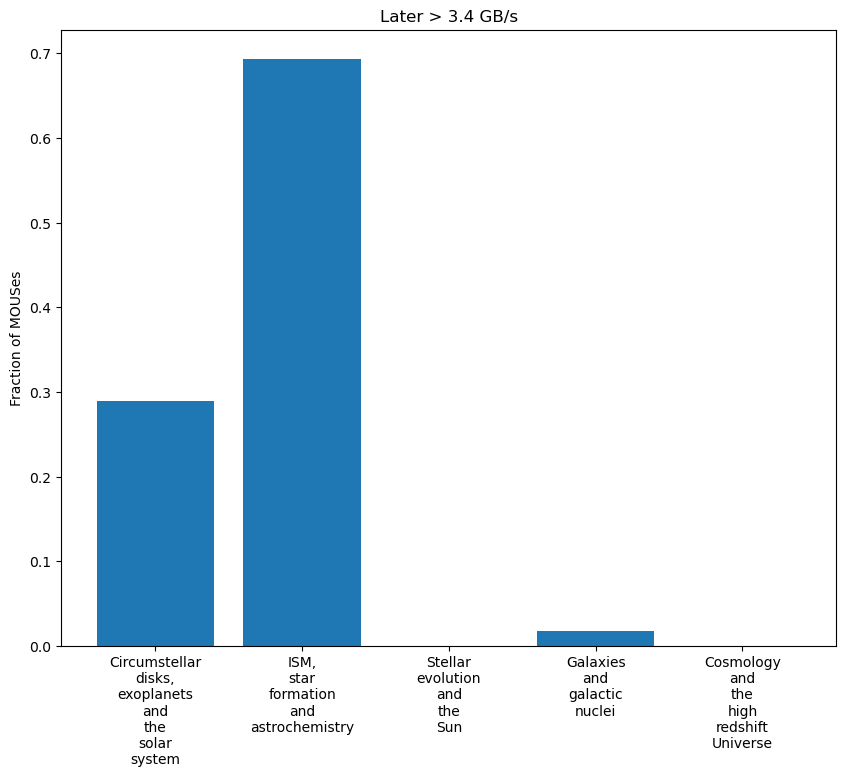

In [148]:
reload(wsu_plots)
idx = band1_band2_rep['wsu_datarate_later_4x_stepped2_typical'] >= 3.4 * u.GB/u.s
wsu_plots.plot_scientific_category_distribution(band1_band2_rep[idx], title='Later > 3.4 GB/s')

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:3150: RuntimeWarning: invalid value encountered in scalar divide
  mycat_count = np.sum(idx)/total


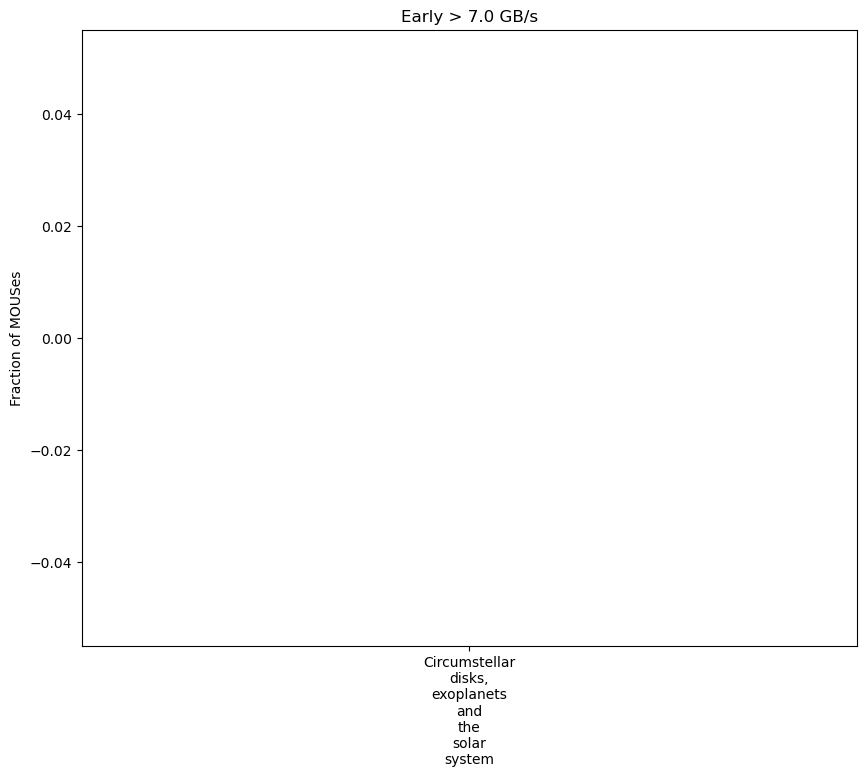

In [149]:
reload(wsu_plots)
idx = band1_band2_rep['wsu_datarate_early_stepped2_typical'] >= 7.0 * u.GB/u.s
wsu_plots.plot_scientific_category_distribution(band1_band2_rep[idx], title='Early > 7.0 GB/s')

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:3150: RuntimeWarning: invalid value encountered in scalar divide
  mycat_count = np.sum(idx)/total


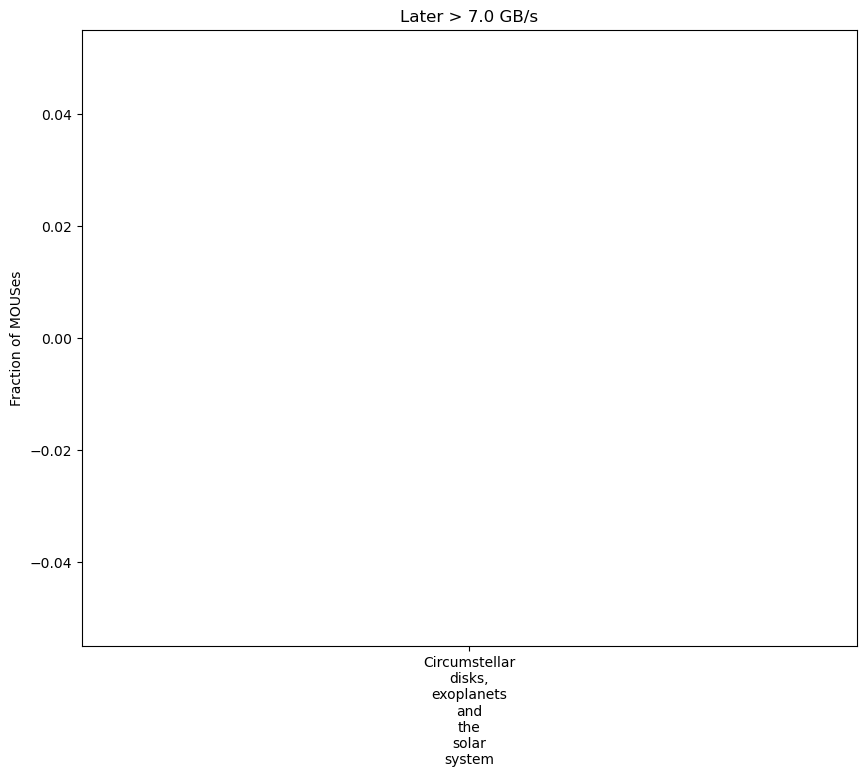

In [150]:
reload(wsu_plots)
idx = band1_band2_rep['wsu_datarate_later_4x_stepped2_typical'] >= 7.0 * u.GB/u.s
wsu_plots.plot_scientific_category_distribution(band1_band2_rep[idx], title='Later > 7.0 GB/s')

## system performance calculations

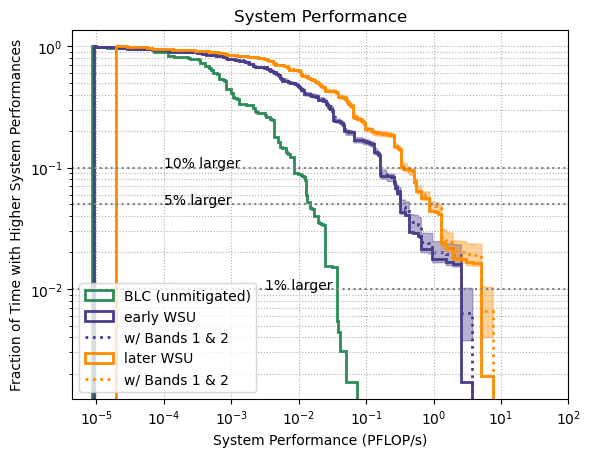

In [151]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(wsu_all,
                                    label='aprojonly',
                                    plot_title='System Performance',
                                    band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                    pltname='plots/sysperf_distribution_aprojonly.png')

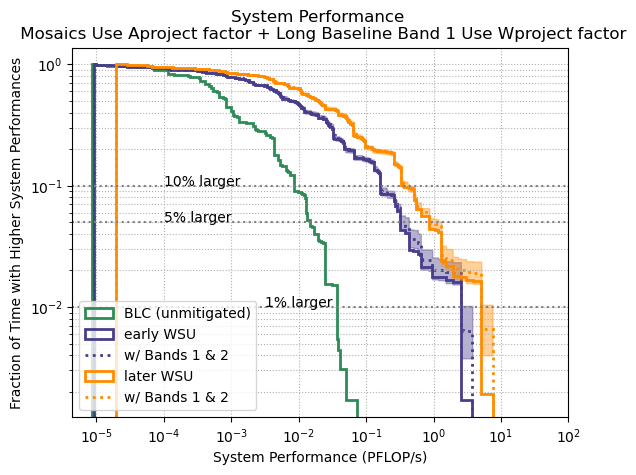

In [152]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(wsu_all,
                                    label='allgrid',
                                    plot_title='System Performance \n Mosaics Use Aproject factor + Long Baseline Band 1 Use Wproject factor',
                                    band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                    pltname='plots/sysperf_distribution_allgrid.png')

In [153]:
idx = band1_band2_rep['flops_per_vis_allgrid'] > 10000.0
band1_band2_rep[idx]['mous','wsu_nchan_spw_stepped2','wsu_nspw_later_4x','flops_per_vis_allgrid','flops_per_vis_aprojonly',
                     'wsu_sysperf_later_4x_stepped2_typical_allgrid', 
                     'wsu_sysperf_later_4x_stepped2_typical_aprojonly']

<Table length=5>
        mous         ... wsu_sysperf_later_4x_stepped2_typical_aprojonly
                     ...                                                
       str22         ...                     float64                    
-------------------- ... -----------------------------------------------
uid://A001/X158e/X51 ...                            0.013352203914999998
uid://A001/X158e/X90 ...                            0.013352203914999998
uid://A001/X1591/X3f ...                            0.013352203914999998
uid://A001/X146d/X16 ...                              0.3204961609849999
uid://A001/X158e/X41 ...                            0.013352203914999998

Very little difference between the allgrid and aprojonly. It looks like the case that triggers project doesn't have that many channels (1543.0 times 8= 12344), so the vis rate isn't particularly high.

# ratio of science to cal visibilities

In [154]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [155]:
wsu_all['wsu_datavol_later_4x_stepped2_typical_cal']

<Quantity [3.6501696 , 1.54703188, 1.54703188, ..., 2.95057728, 2.91646656,
           0.59184332] Gbyte>

In [156]:
np.max(wsu_all['wsu_datavol_early_stepped2_typical_cal'])

<Quantity 14244.36975562 Gbyte>

In [157]:
np.median(wsu_all['wsu_datavol_early_stepped2_typical_cal'].value)

16.795763208

0.3414634146341463


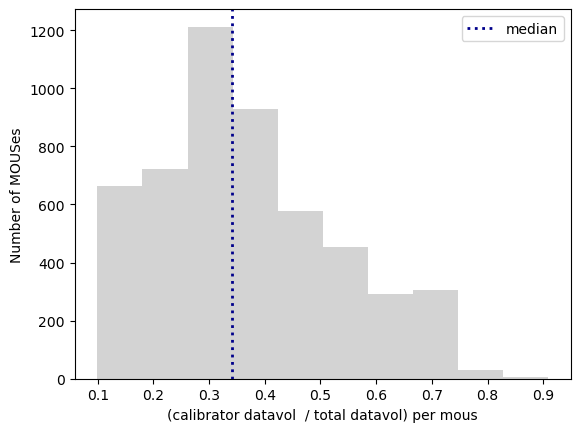

In [158]:
reload(wsu_plots)
wsu_plots.ratio_cal_total_times(wsu_all,
                               pltname='plots/ratio_cal_total.png')

In [159]:
np.log10(np.max(wsu_all['wsu_nchan_spw_stepped2']))

<Quantity 4.8696658>

In [160]:
np.max(wsu_all['imsize'])

10440.0

## Band 3 information

In [161]:
idx = (wsu_all['mosaic'] == 'T') & (wsu_all['band'] == 3)
band3_mosaic = np.sum(idx)
print(band3_mosaic)

261


In [162]:
idx = (wsu_all['mosaic'] == 'T') & (wsu_all['band'] == 3) & (wsu_all['array'] == '12m')
band3_mosaic_12m = np.sum(idx)
print(band3_mosaic_12m)

119


In [163]:
idx = (wsu_all['mosaic'] == 'T') & (wsu_all['band'] == 3) & (wsu_all['array'] == '7m')
band3_mosaic_7m = np.sum(idx)
print(band3_mosaic_7m)

142


In [164]:
idx = (wsu_all['band'] == 3)
band3_tot = np.sum(idx)
print(band3_tot)

1440


In [165]:
idx = (wsu_all['band'] == 3) & (wsu_all['array'] == '12m')
band3_tot_12m = np.sum(idx)
print(band3_tot_12m)

1054


In [166]:
idx = (wsu_all['band'] == 3) & (wsu_all['array'] == '7m')
band3_tot_7m = np.sum(idx)
print(band3_tot_7m)

386


In [167]:
band3_mosaic/band3_tot

0.18125

In [168]:
len(wsu_all)

5192

In [169]:
1448/5200

0.2784615384615385

In [170]:
cycle7_cycle8_orig['band_list'] == 3

array([ True,  True,  True, ..., False, False, False])

45365
[[   76.  3115. 29488.  5517.  7169.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]]


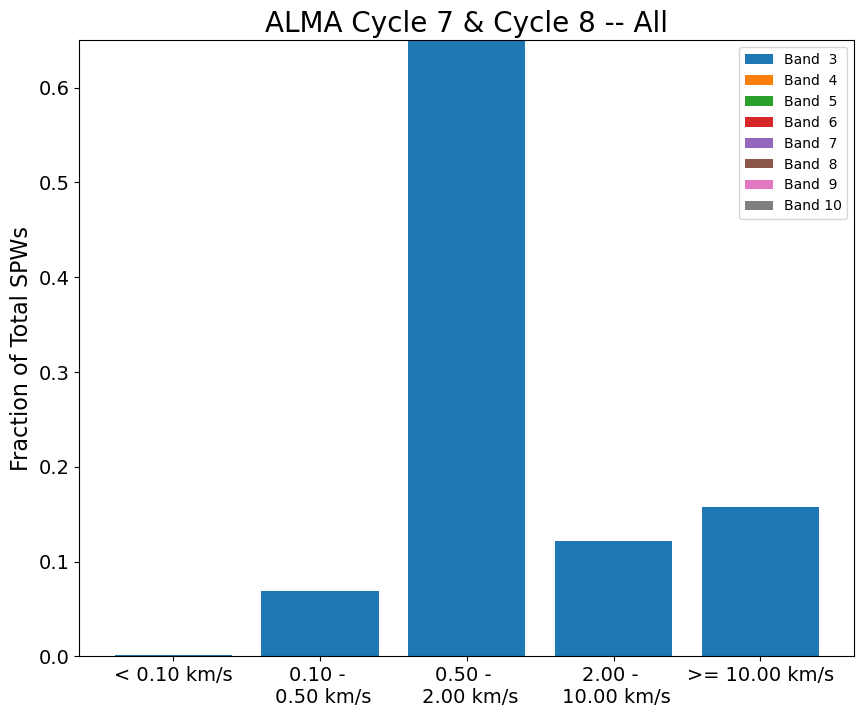

In [171]:
reload(wsu_plots)
idx = (cycle7_cycle8_orig['band_list'] == 3)
vel_hist = wsu_plots.make_velocity_bar(cycle7_cycle8_orig[idx],title='ALMA Cycle 7 & Cycle 8 -- All')

39564
[[   48.  1440. 28442.  3048.  6586.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]]


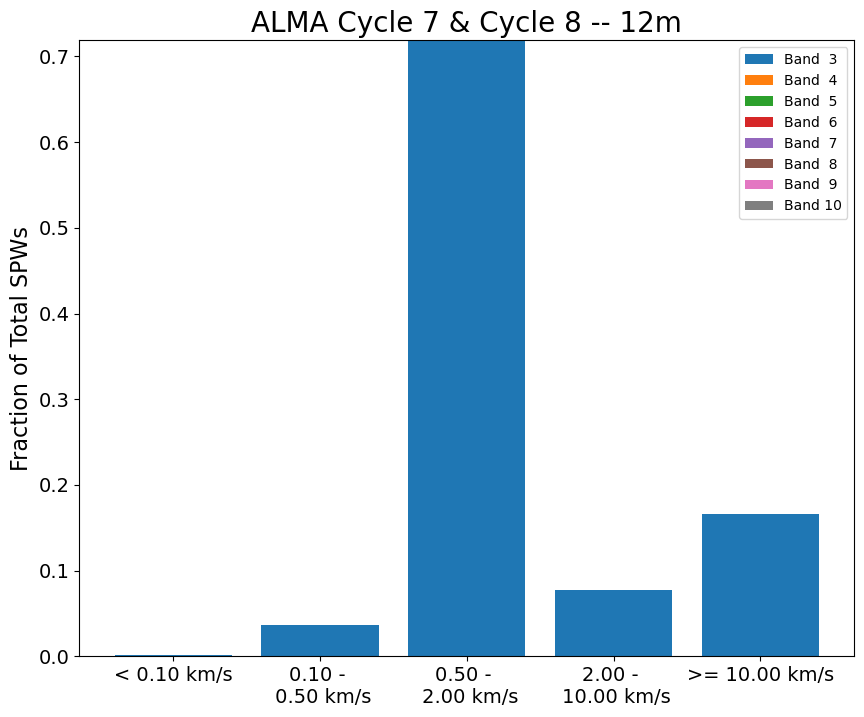

In [172]:
reload(wsu_plots)
idx = (cycle7_cycle8_orig['band_list'] == 3) & (cycle7_cycle8_orig['array'] == '12m')
vel_hist = wsu_plots.make_velocity_bar(cycle7_cycle8_orig[idx],title='ALMA Cycle 7 & Cycle 8 -- 12m')

4137
[[  11. 1326.  464. 1848.  488.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]


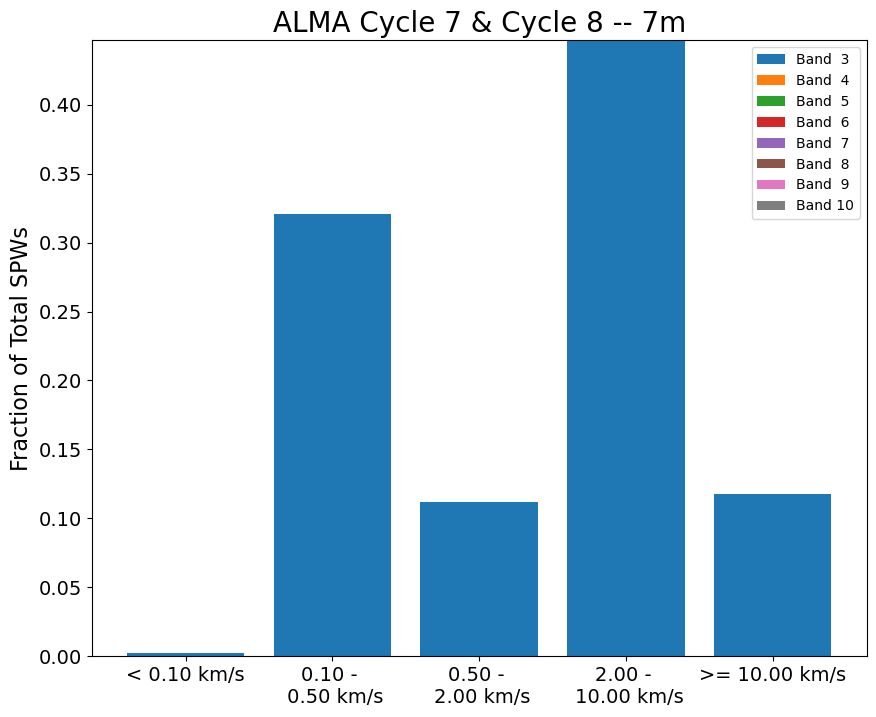

In [173]:
reload(wsu_plots)
idx = (cycle7_cycle8_orig['band_list'] == 3) & (cycle7_cycle8_orig['array'] == '7m')
vel_hist = wsu_plots.make_velocity_bar(cycle7_cycle8_orig[idx],title='ALMA Cycle 7 & Cycle 8 -- 7m')

In [174]:
idx = wsu_all['scientific_category'] == 'Cosmology'
np.unique(wsu_all[idx]['scientific_category','science_keyword'])

array([('Cosmology', "Cosmic Microwave Background (CMB)/Sunyaev-Zel'dovich Effect (SZE), Galaxy Clusters"),
       ('Cosmology', 'Damped Lyman Alpha (DLA) systems'),
       ('Cosmology', 'Damped Lyman Alpha (DLA) systems, Galaxy structure & evolution'),
       ('Cosmology', 'Damped Lyman Alpha (DLA) systems, Gamma Ray Bursts (GRB)'),
       ('Cosmology', 'Galaxy Clusters'),
       ('Cosmology', 'Galaxy groups and clusters'),
       ('Cosmology', 'Galaxy groups and clusters, Giant Molecular Clouds (GMC) properties'),
       ('Cosmology', 'Gamma Ray Bursts (GRB)'),
       ('Cosmology', 'Gravitational lenses'),
       ('Cosmology', 'Gravitational lenses, Galaxy structure & evolution')],
      dtype=[('scientific_category', '<U27'), ('science_keyword', '<U105')])

In [175]:
np.unique(wsu_all['science_keyword'])

<Column name='science_keyword' dtype='str105' length=164>
                                  Active Galactic Nuclei (AGN)/Quasars (QSO)
             Active Galactic Nuclei (AGN)/Quasars (QSO), Early-type galaxies
         Active Galactic Nuclei (AGN)/Quasars (QSO), Galactic centres/nuclei
Active Galactic Nuclei (AGN)/Quasars (QSO), Merging and interacting galaxies
        Active Galactic Nuclei (AGN)/Quasars (QSO), Outflows, jets, feedback
             Active Galactic Nuclei (AGN)/Quasars (QSO), Surveys of galaxies
                                                              Astrochemistry
                 Astrochemistry, Inter-Stellar Medium (ISM)/Molecular clouds
                                           Astrochemistry, Magellanic Clouds
                                                                         ...
                                 Sub-mm Galaxies (SMG), Gravitational lenses
                  Sub-mm Galaxies (SMG), High-z Active Galactic Nuclei (AGN)
                                                      Supernovae (SN) ejecta
                                          Supernovae (SN) ejecta, Transients
                                                         Surveys of galaxies
                             Surveys of galaxies, Galaxy groups and clusters
                                                                  Transients
                                                    White dwarfs, Transients

In [176]:
np.unique(wsu_all['scientific_category_proposal'])

<Column name='scientific_category_proposal' dtype='str52' length=5>
Circumstellar disks, exoplanets and the solar system
            Cosmology and the high redshift Universe
                        Galaxies and galactic nuclei
              ISM, star formation and astrochemistry
                       Stellar evolution and the Sun

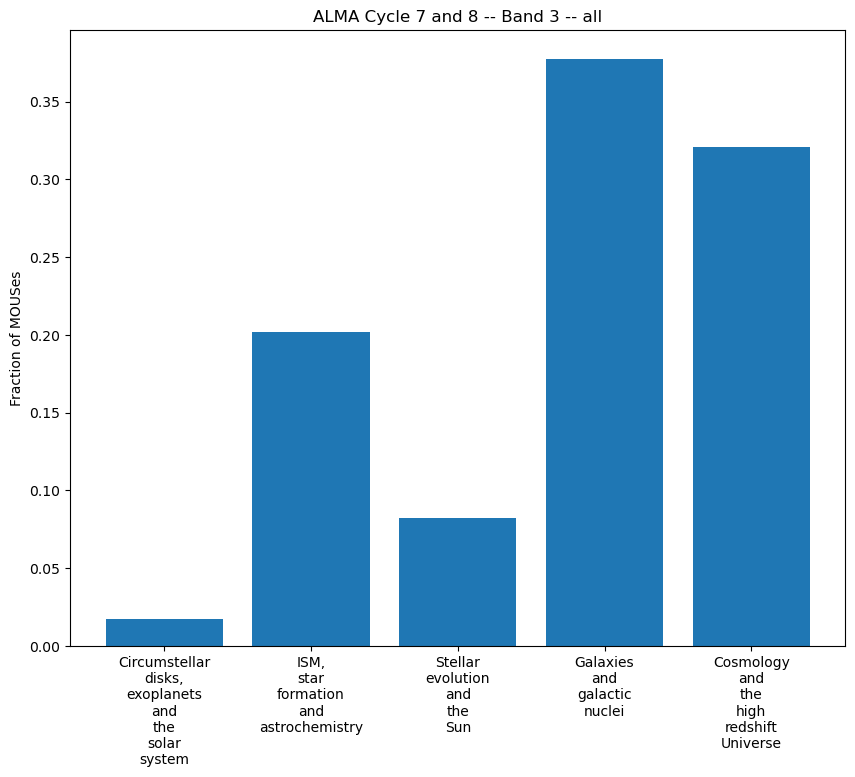

In [177]:
reload(wsu_plots)
idx = wsu_all['band'] == 3
wsu_plots.plot_scientific_category_distribution(wsu_all[idx], title='ALMA Cycle 7 and 8 -- Band 3 -- all')

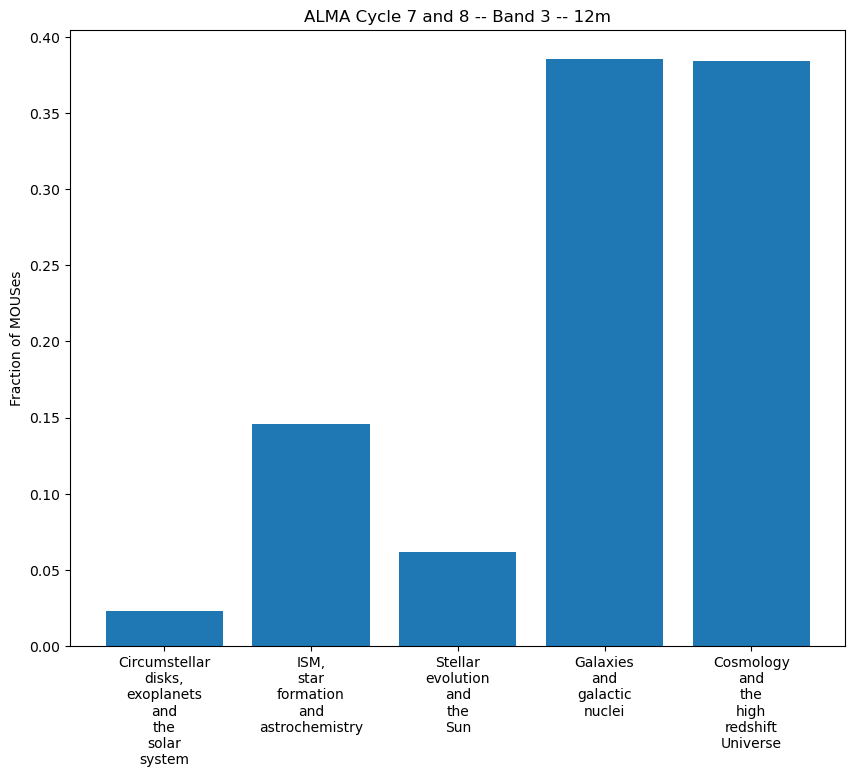

In [178]:
reload(wsu_plots)
idx =( wsu_all['band'] == 3 ) & ( wsu_all['array'] == '12m')
wsu_plots.plot_scientific_category_distribution(wsu_all[idx], title='ALMA Cycle 7 and 8 -- Band 3 -- 12m')

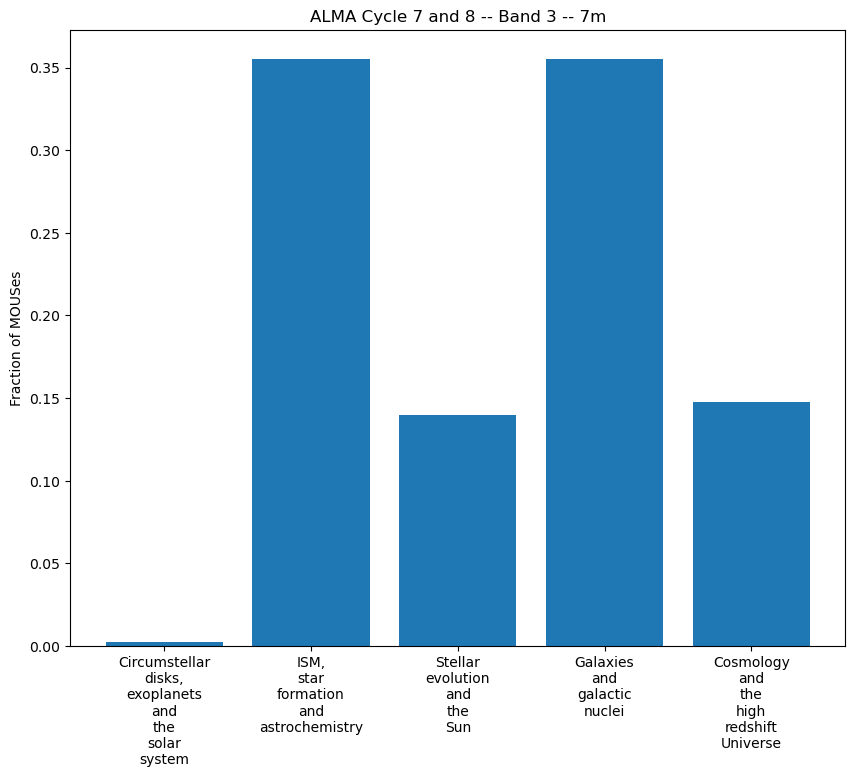

In [179]:
reload(wsu_plots)
idx =( wsu_all['band'] == 3 ) & ( wsu_all['array'] == '7m')
wsu_plots.plot_scientific_category_distribution(wsu_all[idx], title='ALMA Cycle 7 and 8 -- Band 3 -- 7m')

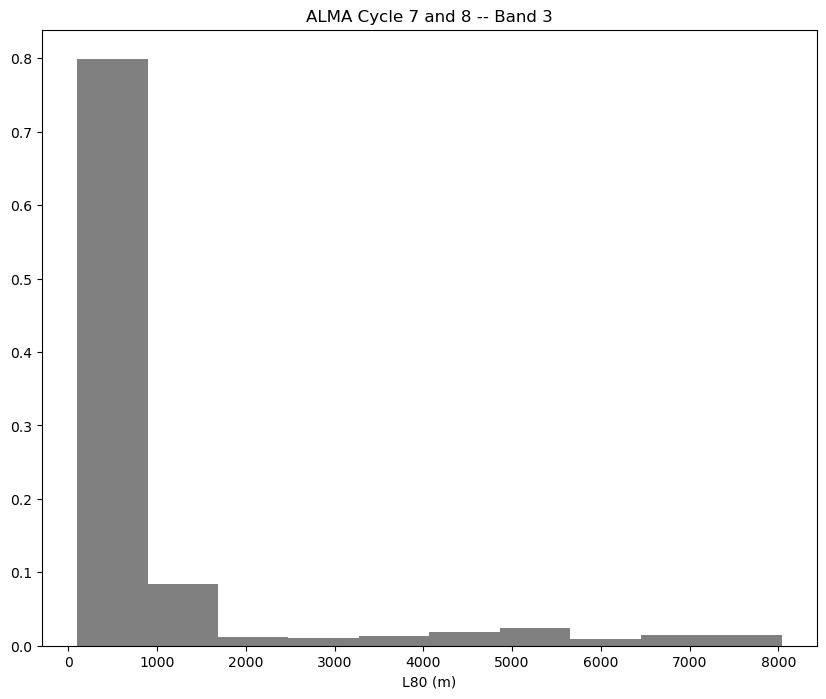

In [180]:
reload(wsu_plots)
idx = (wsu_all['band'] == 3) & (wsu_all['array'] == '12m')
wsu_plots.plot_l80(wsu_all[idx])

In [181]:
idx = (wsu_all['wsu_npol'] > 2 ) & (wsu_all['band'] == 3)
np.sum(idx)

14

In [182]:
np.unique(wsu_all['scientific_category_proposal'])

<Column name='scientific_category_proposal' dtype='str52' length=5>
Circumstellar disks, exoplanets and the solar system
            Cosmology and the high redshift Universe
                        Galaxies and galactic nuclei
              ISM, star formation and astrochemistry
                       Stellar evolution and the Sun

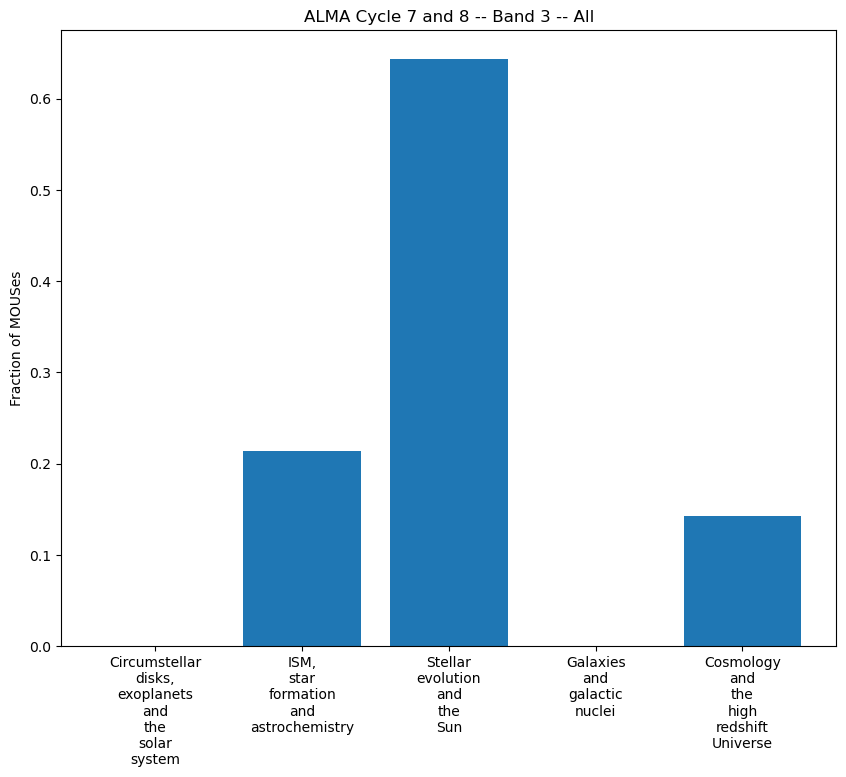

In [183]:
reload(wsu_plots)
idx = (wsu_all['wsu_npol'] > 2 ) & (wsu_all['band'] == 3)
wsu_plots.plot_scientific_category_distribution(wsu_all[idx], title='ALMA Cycle 7 and 8 -- Band 3 -- All')

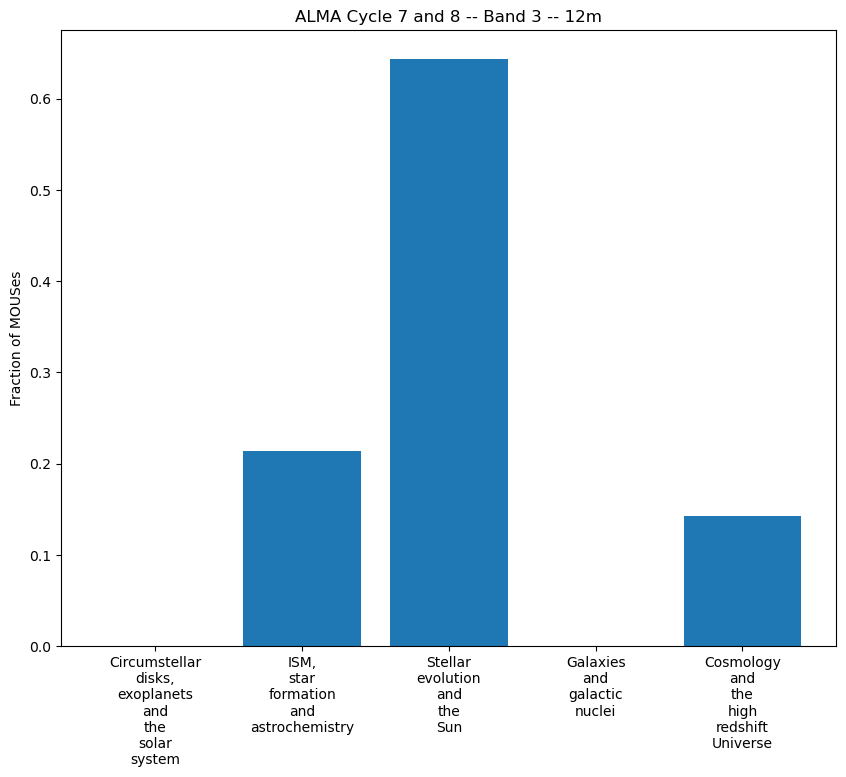

In [184]:
reload(wsu_plots)
idx = (wsu_all['wsu_npol'] > 2 ) & (wsu_all['band'] == 3) & (wsu_all['array'] == '12m')
wsu_plots.plot_scientific_category_distribution(wsu_all[idx], title='ALMA Cycle 7 and 8 -- Band 3 -- 12m')

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:3150: RuntimeWarning: invalid value encountered in scalar divide
  mycat_count = np.sum(idx)/total


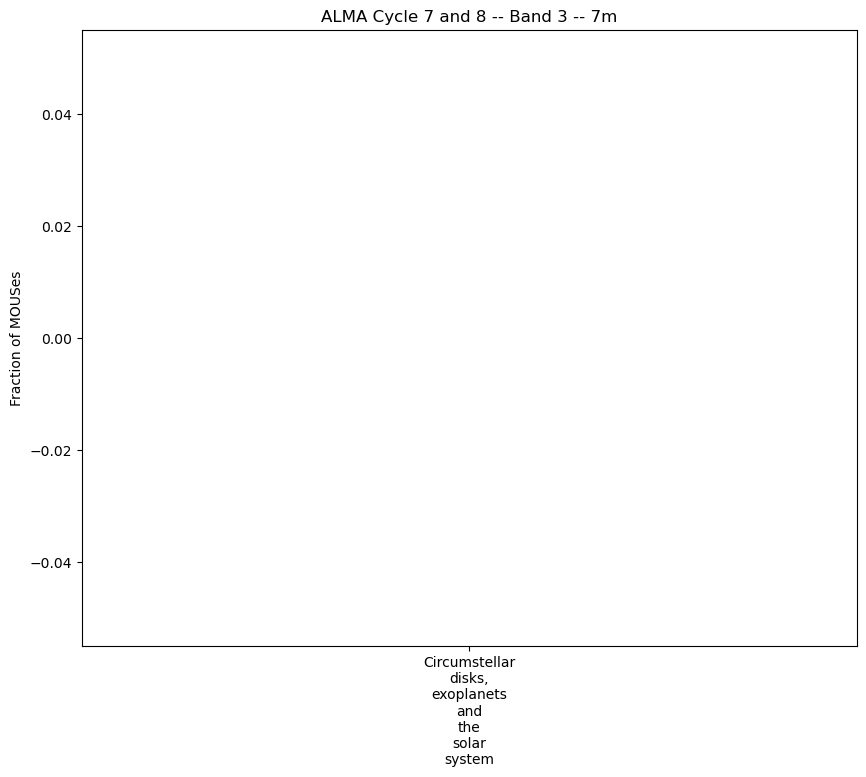

In [185]:
reload(wsu_plots)
idx = (wsu_all['wsu_npol'] > 2 ) & (wsu_all['band'] == 3) & (wsu_all['array'] == '7m')
wsu_plots.plot_scientific_category_distribution(wsu_all[idx], title='ALMA Cycle 7 and 8 -- Band 3 -- 7m')

In [186]:
22/1448

0.015193370165745856

In [187]:
for myband  in [3,4,5,6,7,8,9,10]:
    idx = wsu_all['band'] == myband
    n_mous_tot = len(wsu_all[idx])
    obs_time_tot = np.nansum(wsu_all[idx]['time_tot'])
    print("{}, , {}, {:4.1f}".format(myband, n_mous_tot, obs_time_tot.to('hr')))
    for myarray in ['12m','7m']:
        idx2 = (wsu_all['band'] == myband) & (wsu_all['array'] == myarray)
        n_mous = len(wsu_all[idx2])
        obs_time = np.nansum(wsu_all[idx2]['time_tot'])
        print("{}, {}, {}, {:4.1f}".format(myband, myarray, n_mous, obs_time.to('hr')))


3, , 1440, 2892.5 h
3, 12m, 1054, 1533.6 h
3, 7m, 386, 1358.8 h
4, , 452, 694.2 h
4, 12m, 300, 377.0 h
4, 7m, 152, 317.2 h
5, , 187, 255.4 h
5, 12m, 130, 200.5 h
5, 7m, 57, 54.9 h
6, , 1981, 3127.0 h
6, 12m, 1161, 1696.3 h
6, 7m, 820, 1430.7 h
7, , 890, 1691.7 h
7, 12m, 603, 1137.9 h
7, 7m, 287, 553.8 h
8, , 201, 415.5 h
8, 12m, 106, 193.8 h
8, 7m, 95, 221.7 h
9, , 33, 71.0 h
9, 12m, 23, 55.7 h
9, 7m, 10, 15.3 h
10, , 8, 13.1 h
10, 12m, 7, 12.2 h
10, 7m, 1,  1.0 h


In [188]:
idx = wsu_all['array'] == '12m'
np.nansum(wsu_all[idx]['time_tot']).to('hr')

<Quantity 5206.93109333 h>

In [189]:
idx = wsu_all['array'] == '7m'
np.nansum(wsu_all[idx]['time_tot']).to('hr')

<Quantity 3953.50750667 h>

In [190]:
wsu_all['array']

<Column name='array' dtype='str3' length=5192>
 7m
 7m
 7m
 7m
 7m
 7m
 7m
 7m
 7m
...
12m
12m
12m
12m
12m
12m
12m
 7m

## looking closer at nbin issue

Crystal and I have different ways of calculating nbin which is causing some decrepancies in our estimates. 

I'm using floor

she is using nearest by >0.1km/s. I believe hers is done by eye (i.e., not programmatically).

The effect is to make my nbin slightly smaller than hers, which shows up a lot in the most extreme cases.

Text(0.5, 1.0, 'WSU Band 3 & Nbin < 8')

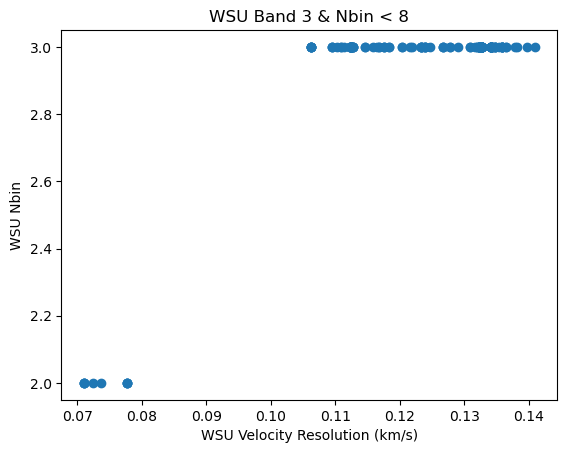

In [192]:
idx = (wsu_all['band'] == 3) & (wsu_all['wsu_chanavg_stepped2'] < 8)
#wsu_all[idx]['mous','band','wsu_freq','wsu_velres_stepped2','wsu_chanavg_stepped2']
plt.scatter(wsu_all[idx]['wsu_velres_stepped2'],wsu_all[idx]['wsu_chanavg_stepped2'])
plt.xlabel('WSU Velocity Resolution (km/s)')
plt.ylabel('WSU Nbin')
plt.title('WSU Band 3 & Nbin < 8')

Text(0.5, 1.0, 'WSU Band 3 & Nbin < 8')

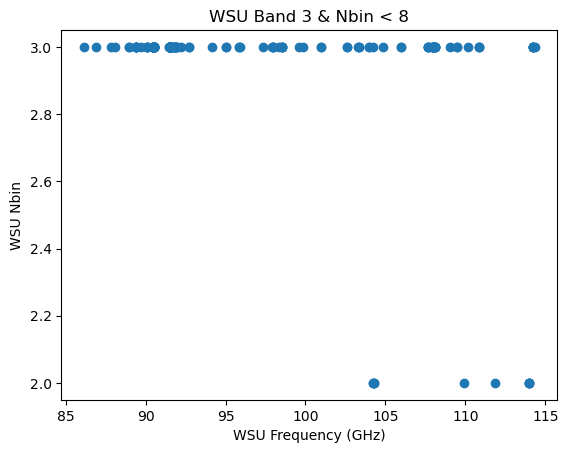

In [193]:
idx = (wsu_all['band'] == 3) & (wsu_all['wsu_chanavg_stepped2'] < 8)
#wsu_all[idx]['mous','band','wsu_freq','wsu_velres_stepped2','wsu_chanavg_stepped2']
plt.scatter(wsu_all[idx]['wsu_freq'],wsu_all[idx]['wsu_chanavg_stepped2'])
plt.xlabel('WSU Frequency (GHz)')
plt.ylabel('WSU Nbin')
plt.title('WSU Band 3 & Nbin < 8')

Text(0.5, 0, 'WSU Nbin')

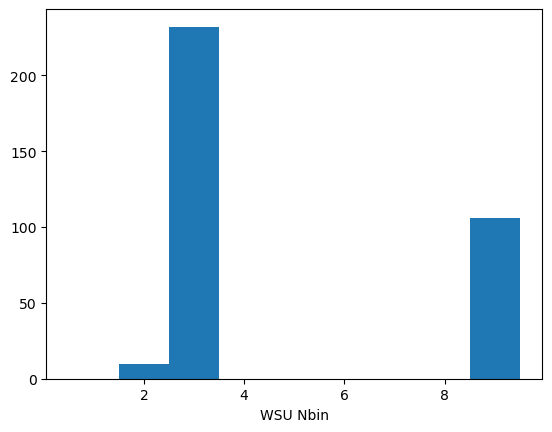

In [196]:
idx = (wsu_all['band'] == 3) & (wsu_all['wsu_chanavg_stepped2'] < 30)
#wsu_all[idx]['mous','band','wsu_freq','wsu_velres_stepped2','wsu_chanavg_stepped2']
plt.hist(wsu_all[idx]['wsu_chanavg_stepped2'],align='left',bins=[1,2,3,4,5,6,7,8,9,10])
plt.xlabel('WSU Nbin')

Text(0.5, 0, 'WSU Nbin')

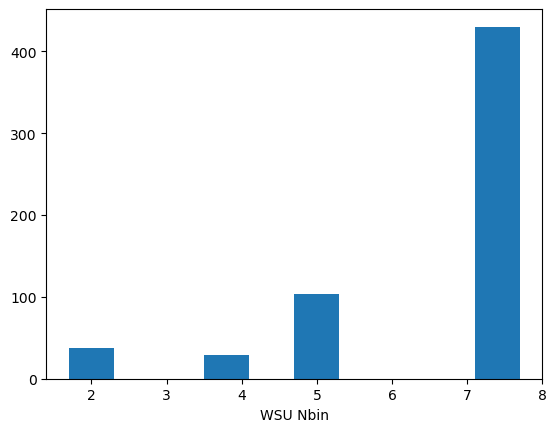

In [197]:
idx = (wsu_all['band'] == 6) & (wsu_all['wsu_chanavg_stepped2'] < 10)
#wsu_all[idx]['mous','band','wsu_freq','wsu_velres_stepped2','wsu_chanavg_stepped2']
plt.hist(wsu_all[idx]['wsu_chanavg_stepped2'],align='left')
plt.xlabel('WSU Nbin')

In [198]:
idx = (wsu_all['band'] == 3) & (wsu_all['wsu_chanavg_stepped2'] < 8)
wsu_all[idx]['mous','band','wsu_freq','blc_velres','wsu_velres_stepped2','wsu_chanavg_stepped2'].show_in_browser(jsviewer=True)

Text(0.5, 1.0, 'velres calc -- band 3 only')

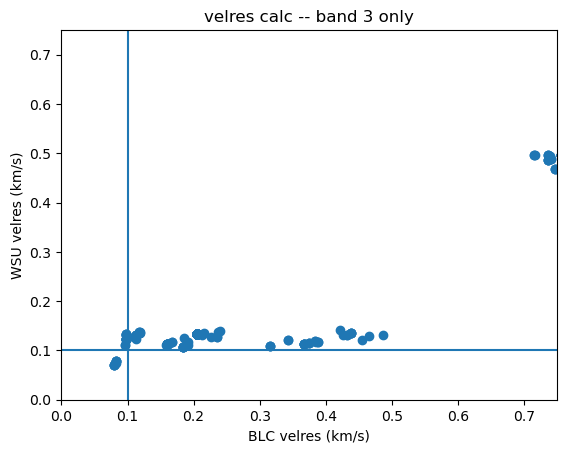

In [200]:
idx = (wsu_all['band'] == 3)
plt.scatter(wsu_all[idx]['blc_velres'],wsu_all[idx]['wsu_velres_stepped2'])
plt.xlabel('BLC velres (km/s)')
plt.ylabel('WSU velres (km/s)')
plt.xlim(0,0.75)
plt.ylim(0,0.75)
plt.axvline(0.1)
plt.axhline(0.1)
plt.title('velres calc -- band 3 only')

### BLC integration times for Dirk

In [ ]:
plt.hist(wsu_all['blc_tint'].value)
plt.xlabel("BLC/ACA integration time (s)")
plt.ylabel("Number of MOUSes")
plt.title("ALMA Cycle  7 and 8")

In [ ]:
np.min(wsu_all['blc_tint'])

In [ ]:
np.max(wsu_all['blc_tint'])

In [ ]:
np.median(wsu_all['blc_tint'])

## largest dynamic range

In [ ]:
wsu_all.columns